In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import subprocess

import os

In [126]:
# Date range
file_name_date = '20231231'
start_date = pd.Timestamp('2020-01-22')
seir_start_date = pd.Timestamp('2021-07-01')
pre_date = pd.Timestamp('2021-10-07') # 예측 시작날짜
end_date = pd.Timestamp('2023-12-31')
# train_date = pd.date_range(start_date,pre_date-timedelta(days=1))
train_date = pd.date_range(start_date,pre_date)

predict_date = pd.date_range(pre_date,end_date) # 예측 날짜 범위
date = pd.date_range(seir_start_date,end_date)

In [127]:
result3 = pd.read_csv("C:/Users/user/Downloads/1025_true_result3.csv")
result4 = pd.read_csv("C:/Users/user/Downloads/1025_true_result4.csv")
result5 = pd.read_csv("C:/Users/user/Downloads/1025_true_result5.csv")

result3

,Unnamed: 0,time,U1,U2,U3,U4,V1,V2,V3,V4,...,V3.incidence,V4.incidence,V.incidence,V_cum,case,RT_,NPID,NPI,VACCINE_,TEST_
0,1,1,8.796616e+06,1.272598e+07,1.565429e+07,4.471542e+06,7.240000e+02,1.257656e+06,1.360168e+06,7.290718e+06,...,1000.0,4000.0,5000.0,5.000000e+03,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
1,2,2,8.782313e+06,1.265117e+07,1.555436e+07,4.431066e+06,1.458900e+04,1.331889e+06,1.459458e+06,7.331003e+06,...,99290.0,40285.0,227673.0,2.326730e+05,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
2,3,3,8.767972e+06,1.257631e+07,1.545438e+07,4.390577e+06,2.845400e+04,1.406122e+06,1.558748e+06,7.371288e+06,...,99290.0,40285.0,227673.0,4.603460e+05,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
3,4,4,8.753600e+06,1.250141e+07,1.535436e+07,4.350081e+06,4.231900e+04,1.480355e+06,1.658038e+06,7.411573e+06,...,99290.0,40285.0,227673.0,6.880190e+05,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
4,5,5,8.739204e+06,1.242649e+07,1.525432e+07,4.309581e+06,5.618400e+04,1.554588e+06,1.757328e+06,7.451858e+06,...,99290.0,40285.0,227673.0,9.156920e+05,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,910,910,1.291059e+06,1.147404e+05,1.252275e+05,4.937172e+04,6.059729e+06,1.369911e+07,1.675012e+07,1.167373e+07,...,0.0,0.0,0.0,3.827841e+07,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
910,911,911,1.291054e+06,1.147400e+05,1.252272e+05,4.937161e+04,6.059729e+06,1.369911e+07,1.675012e+07,1.167373e+07,...,0.0,0.0,0.0,3.827841e+07,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
911,912,912,1.291048e+06,1.147397e+05,1.252270e+05,4.937151e+04,6.059729e+06,1.369911e+07,1.675012e+07,1.167373e+07,...,0.0,0.0,0.0,3.827841e+07,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
912,913,913,1.291043e+06,1.147394e+05,1.252267e+05,4.937141e+04,6.059729e+06,1.369911e+07,1.675012e+07,1.167373e+07,...,0.0,0.0,0.0,3.827841e+07,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1


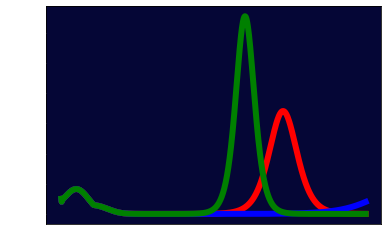

In [128]:
plt.plot(result3['time'], result3['TP.incidence'],color = 'r',  linewidth = 6)
plt.plot(result4['time'], result4['TP.incidence'],color = 'b',  linewidth = 6)
plt.plot(result5['time'], result5['TP.incidence'],color = 'g',  linewidth = 6)

plt.show()

In [129]:
all_seir_date = int(str(end_date-seir_start_date)[:3])+1
all_seir_date

914

In [130]:
# Option
rt = [3.5, 4, 4.5]
npi = [0.85, 1]
# npi2 = [0.85, 1]
vac = [0.8, 1, 1.2]
test = [0.95, 1, 1.2]

In [131]:
path_0 = '../../../04_result/SEIR/SD_1103.csv'
path_1 = '../../../04_result/SEIR/TP_1103.csv'
path_2 = '../../../01_data/국제/수집데이터_211022.xlsx'
path_3 = '../../../04_result/SEIR/owid-covid-data.csv'

In [132]:
data_case= pd.read_excel(path_2, date_format='%Y-%m-%d',engine = "openpyxl",sheet_name ='확진자,사망자수(US 제외)' )
data_case=data_case[data_case['Country'] =='South Korea']
#df_= df_1_2.drop(['Province1','Province2','Unnamed: 6'], axis=1, inplace=True)
data_case.drop(['Province1','Province2'], axis=1, inplace=True)
data_case

,tDate,Country,Confirmed,Deaths
38,2020-01-22,South Korea,0.0,0.0
86,2020-01-23,South Korea,0.0,0.0
130,2020-01-24,South Korea,1.0,0.0
177,2020-01-25,South Korea,0.0,0.0
225,2020-01-26,South Korea,1.0,0.0
...,...,...,...,...
369155,2021-10-08,South Korea,2172.0,10.0
369878,2021-10-09,South Korea,1949.0,6.0
370601,2021-10-10,South Korea,1594.0,15.0
371324,2021-10-11,South Korea,1297.0,8.0


In [160]:
## 과거 확진자, 사망자

old_data= data_case[ data_case['tDate'].isin(train_date) ] #Confirmed, Deaths
old_data = old_data.fillna(0)

## 없는 데이터...
old_data.loc[old_data['tDate']=='2021-09-25','Confirmed']= 3273
old_data.loc[old_data['tDate']=='2021-10-03','Confirmed']= 2086

## 튀는 데이터...
old_data.loc[old_data['tDate']=='2021-09-26','Confirmed']= 2771
old_data.loc[old_data['tDate']=='2021-10-04','Confirmed']= 1673
old_data.reset_index(drop=True, inplace=True)
old_data

,tDate,Country,Confirmed,Deaths
0,2020-01-22,South Korea,0.0,0.0
1,2020-01-23,South Korea,0.0,0.0
2,2020-01-24,South Korea,1.0,0.0
3,2020-01-25,South Korea,0.0,0.0
4,2020-01-26,South Korea,1.0,0.0
...,...,...,...,...
610,2021-10-02,South Korea,2247.0,7.0
611,2021-10-04,South Korea,1673.0,9.0
612,2021-10-05,South Korea,1575.0,11.0
613,2021-10-06,South Korea,2027.0,12.0


In [161]:
## 누적사망자
old_data['Cum_Deaths']=0.0
for i in range(1,len(old_data)):
    old_data.loc[[i],['Cum_Deaths']] = float(old_data.loc[[i],['Deaths']].values)+float(old_data.loc[[i-1],['Cum_Deaths']].values)
old_data

,tDate,Country,Confirmed,Deaths,Cum_Deaths
0,2020-01-22,South Korea,0.0,0.0,0.0
1,2020-01-23,South Korea,0.0,0.0,0.0
2,2020-01-24,South Korea,1.0,0.0,0.0
3,2020-01-25,South Korea,0.0,0.0,0.0
4,2020-01-26,South Korea,1.0,0.0,0.0
...,...,...,...,...,...
610,2021-10-02,South Korea,2247.0,7.0,2510.0
611,2021-10-04,South Korea,1673.0,9.0,2519.0
612,2021-10-05,South Korea,1575.0,11.0,2530.0
613,2021-10-06,South Korea,2027.0,12.0,2542.0


In [138]:
#일별 중증자 수 - severity
data_sev_1= pd.read_excel(path_2,engine = "openpyxl",date_format='%Y-%m-%d',sheet_name ='확진자 관리현황',usecols = 'A,H' )

sev_start_date = data_sev_1['tDate'][0]                # 시작 날짜(이전의 데이터를 붙이기 위해 필요)
sev_end_date = data_sev_1['tDate'][len(data_sev_1)-1]  # 끝 날짜 (이후의 데이터를 붙이기 위해 필요)

data_sev_1.rename(columns = {'tDate' : 'Date','TodayIllPatient':'Severity'}, inplace = True)
data_sev_1_2 = data_sev_1.fillna(0)
data_sev_1_2

data_sev_2 = pd.read_csv('../../../01_data/covid19_Nov2.csv',usecols=[0,6])
data_sev_2['Date'] = pd.to_datetime(data_sev_2['Date'])
old_sev = data_sev_2.loc[data_sev_2['Date']<sev_start_date]
old_sev_1 = old_sev.fillna(0)
old_sev_1

old_severity = pd.concat([old_sev_1,data_sev_1_2])
old_severity

,Date,Severity
0,2020-01-20,0.0
1,2020-01-21,0.0
2,2020-01-22,0.0
3,2020-01-23,0.0
4,2020-01-24,0.0
...,...,...
382,2021-10-02,336.0
383,2021-10-03,346.0
384,2021-10-04,348.0
385,2021-10-05,346.0


In [75]:
tp_data = pd.read_csv(path_1)
tp_data

,Unnamed: 0,time,U1,U2,U3,U4,V1,V2,V3,V4,...,V3.incidence,V4.incidence,V.incidence,V_cum,case,RT_,NPID,NPI,VACCINE_,TEST_
0,1,1,8.796616e+06,1.272598e+07,1.565429e+07,4.471542e+06,7.240000e+02,1.257656e+06,1.360168e+06,7.290718e+06,...,1000.0,4000.0,5000.0,5.000000e+03,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
1,2,2,8.782313e+06,1.265117e+07,1.555436e+07,4.431066e+06,1.458900e+04,1.331889e+06,1.459458e+06,7.331003e+06,...,99290.0,40285.0,227673.0,2.326730e+05,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
2,3,3,8.767972e+06,1.257631e+07,1.545438e+07,4.390577e+06,2.845400e+04,1.406122e+06,1.558748e+06,7.371288e+06,...,99290.0,40285.0,227673.0,4.603460e+05,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
3,4,4,8.753600e+06,1.250141e+07,1.535436e+07,4.350081e+06,4.231900e+04,1.480355e+06,1.658038e+06,7.411573e+06,...,99290.0,40285.0,227673.0,6.880190e+05,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
4,5,5,8.739204e+06,1.242649e+07,1.525432e+07,4.309581e+06,5.618400e+04,1.554588e+06,1.757328e+06,7.451858e+06,...,99290.0,40285.0,227673.0,9.156920e+05,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24673,24674,910,1.636466e+06,-9.026524e+05,-1.025576e+06,-4.170986e+04,7.008096e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1,4.5,300,1.00,1.2,1
24674,24675,911,1.636466e+06,-9.026524e+05,-1.025576e+06,-4.170986e+04,7.008096e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1,4.5,300,1.00,1.2,1
24675,24676,912,1.636466e+06,-9.026524e+05,-1.025576e+06,-4.170986e+04,7.008096e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1,4.5,300,1.00,1.2,1
24676,24677,913,1.636466e+06,-9.026524e+05,-1.025576e+06,-4.170986e+04,7.008096e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1,4.5,300,1.00,1.2,1


In [76]:
tp_data['TP.incidence']

0        1000.000000
1         803.673187
2         870.884447
3         917.141231
4         951.857453
            ...     
24673       0.000000
24674       0.000000
24675       0.000000
24676       0.000000
24677       0.000000
Name: TP.incidence, Length: 24678, dtype: float64

In [146]:
s_d_data = pd.read_csv(path_0)
s_d_data

,Unnamed: 0,time,U1,U2,U3,U4,V1,V2,V3,V4,...,V3.incidence,V4.incidence,V.incidence,V_cum,case,RT_,NPID,NPI,VACCINE_,TEST_
0,1,1,8.796616e+06,1.272598e+07,1.565429e+07,4.471542e+06,7.240000e+02,1.257656e+06,1.360168e+06,7.290718e+06,...,1000.0,4000.0,5000.0,5.000000e+03,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
1,2,2,8.782313e+06,1.265117e+07,1.555436e+07,4.431066e+06,1.458900e+04,1.331889e+06,1.459458e+06,7.331003e+06,...,99290.0,40285.0,227673.0,2.326730e+05,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
2,3,3,8.767972e+06,1.257631e+07,1.545438e+07,4.390577e+06,2.845400e+04,1.406122e+06,1.558748e+06,7.371288e+06,...,99290.0,40285.0,227673.0,4.603460e+05,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
3,4,4,8.753600e+06,1.250141e+07,1.535436e+07,4.350081e+06,4.231900e+04,1.480355e+06,1.658038e+06,7.411573e+06,...,99290.0,40285.0,227673.0,6.880190e+05,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
4,5,5,8.739204e+06,1.242649e+07,1.525432e+07,4.309581e+06,5.618400e+04,1.554588e+06,1.757328e+06,7.451858e+06,...,99290.0,40285.0,227673.0,9.156920e+05,RT 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ 1,3.5,300,0.85,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24673,24674,910,1.636466e+06,-9.026518e+05,-1.025576e+06,-4.170988e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1,4.5,300,1.00,1.2,1
24674,24675,911,1.636466e+06,-9.026518e+05,-1.025576e+06,-4.170988e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1,4.5,300,1.00,1.2,1
24675,24676,912,1.636466e+06,-9.026518e+05,-1.025576e+06,-4.170988e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1,4.5,300,1.00,1.2,1
24676,24677,913,1.636466e+06,-9.026518e+05,-1.025576e+06,-4.170988e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1,4.5,300,1.00,1.2,1


In [158]:
s_d_data['D']

0        2500.000000
1        2500.187768
2        2500.388105
3        2500.602012
4        2500.829994
            ...     
24673    2586.988126
24674    2586.988126
24675    2586.988126
24676    2586.988126
24677    2586.988126
Name: D, Length: 24678, dtype: float64

In [77]:
len(tp_data)

24678

In [78]:
_data = pd.read_csv(path_3)

_data=_data[_data['location'] =='South Korea']
_data['date'] = pd.to_datetime(_data['date'], format="%Y-%m-%d")
_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
102729,KOR,Asia,South Korea,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
102730,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
102731,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
102732,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
102733,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103354,KOR,Asia,South Korea,2021-10-07,327976.0,2172.0,2029.000,2554.0,10.0,8.143,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
103355,KOR,Asia,South Korea,2021-10-08,329925.0,1949.0,1986.429,2560.0,6.0,8.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
103356,KOR,Asia,South Korea,2021-10-09,331519.0,1594.0,1916.286,2575.0,15.0,9.714,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
103357,KOR,Asia,South Korea,2021-10-10,332816.0,1297.0,1862.714,2583.0,8.0,10.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN


In [79]:
_data['new_cases']

102729       NaN
102730       NaN
102731       0.0
102732       1.0
102733       0.0
           ...  
103354    2172.0
103355    1949.0
103356    1594.0
103357    1297.0
103358    1347.0
Name: new_cases, Length: 630, dtype: float64

In [156]:
def TP_Plot(y,folder_name,file_name,option):

    ################스타일#######################################
    fig = plt.figure(figsize=(40,15)) ## 캔버스 생성
    fig.patch.set_facecolor('#050636') 
    plt.rcParams['text.color'] = 'w'
    plt.rcParams['xtick.color'] = 'w'
    plt.rcParams['ytick.color'] = 'w'
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.facecolor']='#050636'
    plt.grid(color='w', linestyle='-', linewidth=3,alpha = 0.5)
    plt.gca().spines['bottom'].set_visible(True) #위 테두리
    plt.gca().spines['left'].set_visible(True) #왼쪽 테두리
    #############################################################
   
    low_data = y[0:all_seir_date]
    low_data['tDate'] = date
    
    base_data = y[all_seir_date:all_seir_date*2]
    base_data['tDate'] = date

    high_data = y[all_seir_date*2:all_seir_date*3]
    high_data['tDate'] = date

#     plt.ylim(y_lim)

    ################ Ground Truth #######################################
    plt.plot(old_data['tDate'], old_data['Confirmed'],color = '#2dcafd',  linewidth = 6)  ## 이유엔 데이터
#     plt.plot(train_date, low_data.loc[(low_data['tDate']>=start_date)&(low_data['tDate']<=pre_date),'TP.incidence'],color = 'w',  linewidth = 6)

#     plt.plot(train_data['tDate'], train_data['Confirmed'],'o',color = 'w',alpha = 0.3)
#     plt.plot(train_date, _data.loc[_data['date'].isin(train_date),'new_cases'],color = '#2dcafd',  linewidth = 6)

    
#     ################ Estimate #######################################
#     plt.plot(train_data['tDate'], base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence'],color = '#2dcafd', linewidth = 8)

#     plt.fill_between(train_data['tDate'],base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence']-300, 
#                     base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence']+300, color = '#2dcafd',alpha=0.2)
    
    
    ################ Low Data #######################################
#     plt.plot(predict_date, low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'TP.incidence'], color ='#09d0a2', linewidth = 8)
    plt.plot(date, low_data['TP.incidence'], color ='#09d0a2', linewidth = 8)

    plt.fill_between(predict_date, low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'TP.incidence']-300, 
                    low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'TP.incidence']+300, color = '#09d0a2',alpha=0.3)
    
    
    ################ Base Data #######################################
#     plt.plot(predict_date, base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'TP.incidence'], color ='#f56be4', linewidth = 8)
    plt.plot(date, base_data['TP.incidence'], color ='#f56be4', linewidth = 8)

    plt.fill_between(predict_date,base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'TP.incidence']-300, 
                    base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'TP.incidence']+300, color = '#f56be4',alpha=0.3)
    
    
    
    ################ High Data #######################################
#     plt.plot(predict_date, high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'TP.incidence'], color ='#f68960', linewidth = 8)
    plt.plot(date, high_data['TP.incidence'], color ='#f68960', linewidth = 8)
 
    plt.fill_between(predict_date, high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'TP.incidence']-300, 
                    high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'TP.incidence']+300, color = '#f68960',alpha=0.3)
    
    
    
    
    
    ################ Legend #######################################
    plt.legend(['Ground-Truth',folder_name+' '+str(option[0]),folder_name+' '+str(option[1]),folder_name+' '+str(option[2])],fontsize=30,loc = 'upper left', edgecolor = 'w') #왜 이게 적용안되지?


    plt.axvline(x = pre_date,linestyle = ':',color='w',linewidth=8, alpha = 0.7)
    
#     plt.title(file_name,fontsize=50)
#     plt.suptitle(file_name, y=1, fontsize=30)
    plt.xticks([old_data.iloc[0,0],'2020-06-01','2020-11-01','2021-05-01',pre_date,'2022-04-01','2022-09-01','2023-03-01','2023-08-01',end_date],[str(old_data.iloc[0,0])[:10],'2020-06','2020-11','2021-05',str(pre_date)[:10],'2022-04','2022-09','2023-03','2023-08',str(end_date)[:10]],fontsize=30)
    plt.yticks(fontsize = 30)
    plt.tight_layout()
#     plt.savefig("../../../07_plot/MA/SEIR/I/"+file_name+".png",dpi=300)
    plt.savefig("../../../04_result/SEIR/211102_test/I/"+file_name+".png",dpi=300)
    plt.show()

In [167]:
def S_Plot(y,folder_name,file_name,option):

    ################스타일#######################################
    fig = plt.figure(figsize=(40,15)) ## 캔버스 생성
    fig.patch.set_facecolor('#050636') 
    plt.rcParams['text.color'] = 'w'
    plt.rcParams['xtick.color'] = 'w'
    plt.rcParams['ytick.color'] = 'w'
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.facecolor']='#050636'
    plt.grid(color='w', linestyle='-', linewidth=3,alpha = 0.5)
    plt.gca().spines['bottom'].set_visible(True) #위 테두리
    plt.gca().spines['left'].set_visible(True) #왼쪽 테두리
    #############################################################
   
    low_data = y[0:all_seir_date]
    low_data['tDate'] = date
    
    base_data = y[all_seir_date:all_seir_date*2]
    base_data['tDate'] = date

    high_data = y[all_seir_date*2:all_seir_date*3]
    high_data['tDate'] = date

#     plt.ylim(y_lim)

    ################ Ground Truth #######################################
    plt.plot(old_severity['Date'], old_severity['Severity'],color = '#2dcafd', linewidth = 6)
#     plt.plot(train_date, low_data.loc[(low_data['tDate']>=start_date)&(low_data['tDate']<=pre_date),'TP.incidence'],color = 'w',  linewidth = 6)

#     plt.plot(train_data['tDate'], train_data['Confirmed'],'o',color = 'w',alpha = 0.3)
#     plt.plot(train_date, _data.loc[_data['date'].isin(train_date),'new_cases'],color = '#2dcafd',  linewidth = 6)

    
#     ################ Estimate #######################################
#     plt.plot(train_data['tDate'], base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence'],color = '#2dcafd', linewidth = 8)

#     plt.fill_between(train_data['tDate'],base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence']-300, 
#                     base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence']+300, color = '#2dcafd',alpha=0.2)
    
    
    ################ Low Data #######################################
#     plt.plot(predict_date, low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'TP.incidence'], color ='#09d0a2', linewidth = 8)
    plt.plot(date, low_data['S'], color ='#09d0a2', linewidth = 8)

    plt.fill_between(predict_date, low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'S']-50, 
                    low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'S']+50, color = '#09d0a2',alpha=0.3)
    
    
    ################ Base Data #######################################
#     plt.plot(predict_date, base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'TP.incidence'], color ='#f56be4', linewidth = 8)
    plt.plot(date, base_data['S'], color ='#f56be4', linewidth = 8)

    plt.fill_between(predict_date,base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'S']-50, 
                    base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'S']+50, color = '#f56be4',alpha=0.3)
    
    
    
    ################ High Data #######################################
#     plt.plot(predict_date, high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'TP.incidence'], color ='#f68960', linewidth = 8)
    plt.plot(date, high_data['S'], color ='#f68960', linewidth = 8)
 
    plt.fill_between(predict_date, high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'S']-50, 
                    high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'S']+50, color = '#f68960',alpha=0.3)
    
    
    
    
    
    ################ Legend #######################################
    plt.legend(['Ground-Truth',folder_name+' '+str(option[0]),folder_name+' '+str(option[1]),folder_name+' '+str(option[2])],fontsize=30,loc = 'upper left', edgecolor = 'w') #왜 이게 적용안되지?


    plt.axvline(x = pre_date,linestyle = ':',color='w',linewidth=8, alpha = 0.7)
    
#     plt.title(file_name,fontsize=50)
#     plt.suptitle(file_name, y=1, fontsize=30)
    plt.xticks([old_severity.iloc[0,0],'2020-06-01','2020-11-01','2021-05-01',pre_date,'2022-04-01','2022-09-01','2023-03-01','2023-08-01',end_date],[str(old_severity.iloc[0,0])[:10],'2020-06','2020-11','2021-05',str(pre_date)[:10],'2022-04','2022-09','2023-03','2023-08',str(end_date)[:10]],fontsize=30)
    plt.yticks(fontsize = 30)
    plt.tight_layout()
#     plt.savefig("../../../07_plot/MA/SEIR/I/"+file_name+".png",dpi=300)
    plt.savefig("../../../04_result/SEIR/211102_test/S/"+file_name+".png",dpi=300)
    plt.show()

In [166]:
def D_Plot(y,folder_name,file_name,option):

    ################스타일#######################################
    fig = plt.figure(figsize=(40,15)) ## 캔버스 생성
    fig.patch.set_facecolor('#050636') 
    plt.rcParams['text.color'] = 'w'
    plt.rcParams['xtick.color'] = 'w'
    plt.rcParams['ytick.color'] = 'w'
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.facecolor']='#050636'
    plt.grid(color='w', linestyle='-', linewidth=3,alpha = 0.5)
    plt.gca().spines['bottom'].set_visible(True) #위 테두리
    plt.gca().spines['left'].set_visible(True) #왼쪽 테두리
    #############################################################
   
    low_data = y[0:all_seir_date]
    low_data['tDate'] = date
    
    base_data = y[all_seir_date:all_seir_date*2]
    base_data['tDate'] = date

    high_data = y[all_seir_date*2:all_seir_date*3]
    high_data['tDate'] = date

#     plt.ylim(y_lim)

    ################ Ground Truth #######################################
    plt.plot(old_data['tDate'], old_data['Cum_Deaths'],color = '#2dcafd', linewidth = 6)
#     plt.plot(train_date, low_data.loc[(low_data['tDate']>=start_date)&(low_data['tDate']<=pre_date),'TP.incidence'],color = 'w',  linewidth = 6)

#     plt.plot(train_data['tDate'], train_data['Confirmed'],'o',color = 'w',alpha = 0.3)
#     plt.plot(train_date, _data.loc[_data['date'].isin(train_date),'new_cases'],color = '#2dcafd',  linewidth = 6)

    
#     ################ Estimate #######################################
#     plt.plot(train_data['tDate'], base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence'],color = '#2dcafd', linewidth = 8)

#     plt.fill_between(train_data['tDate'],base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence']-300, 
#                     base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence']+300, color = '#2dcafd',alpha=0.2)
    
    
    ################ Low Data #######################################
#     plt.plot(predict_date, low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'TP.incidence'], color ='#09d0a2', linewidth = 8)
    plt.plot(date, low_data['D'], color ='#09d0a2', linewidth = 8)

    plt.fill_between(predict_date, low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'D']-30, 
                    low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'D']+30, color = '#09d0a2',alpha=0.3)
    
    
    ################ Base Data #######################################
#     plt.plot(predict_date, base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'TP.incidence'], color ='#f56be4', linewidth = 8)
    plt.plot(date, base_data['D'], color ='#f56be4', linewidth = 8)

    plt.fill_between(predict_date,base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'D']-30, 
                    base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'D']+30, color = '#f56be4',alpha=0.3)
    
    
    
    ################ High Data #######################################
#     plt.plot(predict_date, high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'TP.incidence'], color ='#f68960', linewidth = 8)
    plt.plot(date, high_data['D'], color ='#f68960', linewidth = 8)
 
    plt.fill_between(predict_date, high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'D']-30, 
                    high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'D']+30, color = '#f68960',alpha=0.3)
    
    
    
    
    
    ################ Legend #######################################
    plt.legend(['Ground-Truth',folder_name+' '+str(option[0]),folder_name+' '+str(option[1]),folder_name+' '+str(option[2])],fontsize=30,loc = 'upper left', edgecolor = 'w') #왜 이게 적용안되지?


    plt.axvline(x = pre_date,linestyle = ':',color='w',linewidth=8, alpha = 0.7)
    
#     plt.title(file_name,fontsize=50)
#     plt.suptitle(file_name, y=1, fontsize=30)
    plt.xticks([old_data.iloc[0,0],'2020-06-01','2020-11-01','2021-05-01',pre_date,'2022-04-01','2022-09-01','2023-03-01','2023-08-01',end_date],[str(old_data.iloc[0,0])[:10],'2020-06','2020-11','2021-05',str(pre_date)[:10],'2022-04','2022-09','2023-03','2023-08',str(end_date)[:10]],fontsize=30)
    plt.yticks(fontsize = 30)
    plt.tight_layout()
#     plt.savefig("../../../07_plot/MA/SEIR/I/"+file_name+".png",dpi=300)
    plt.savefig("../../../04_result/SEIR/211102_test/D/"+file_name+".png",dpi=300)
    plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

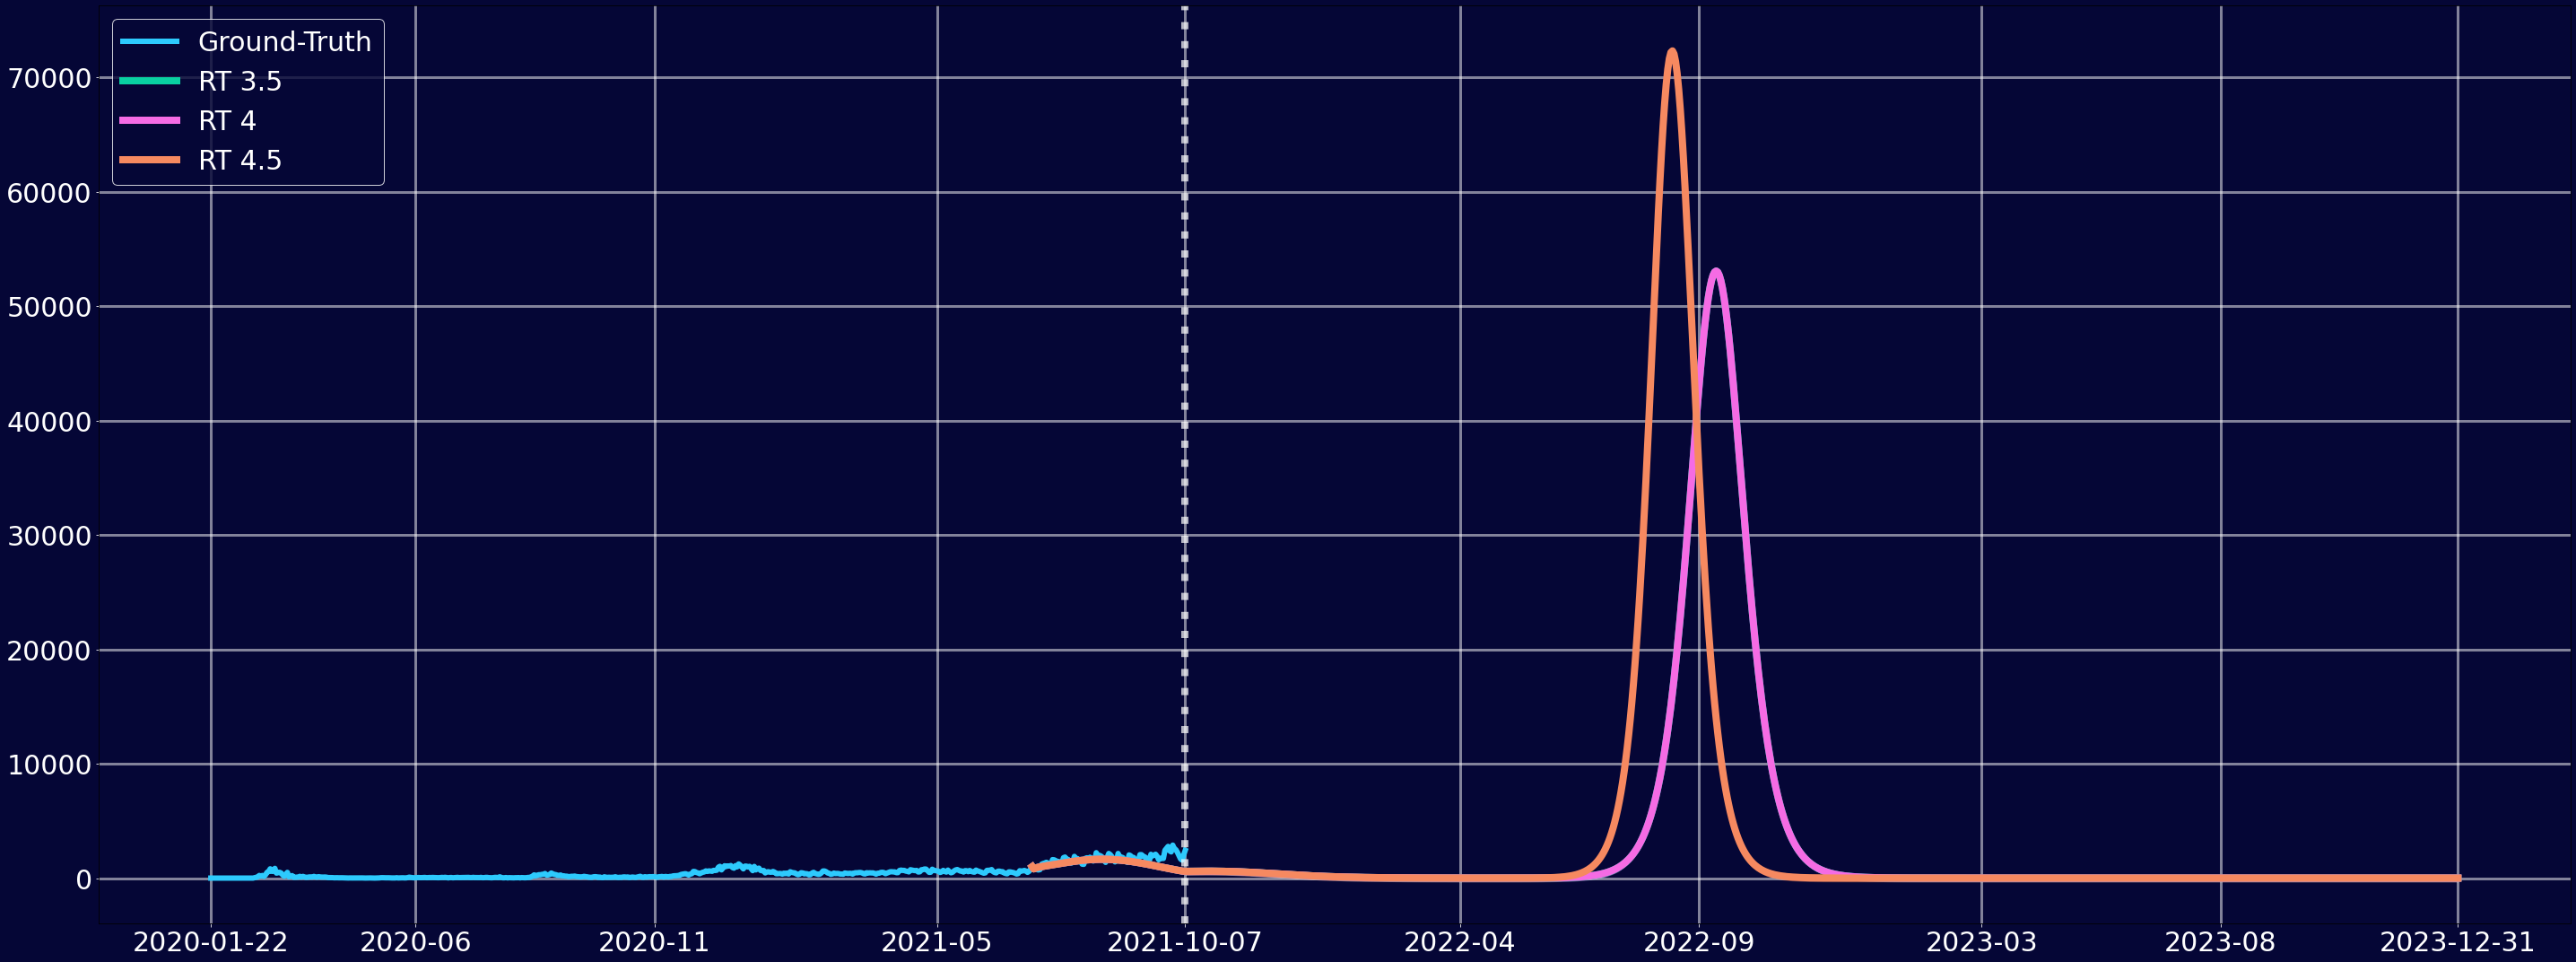

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

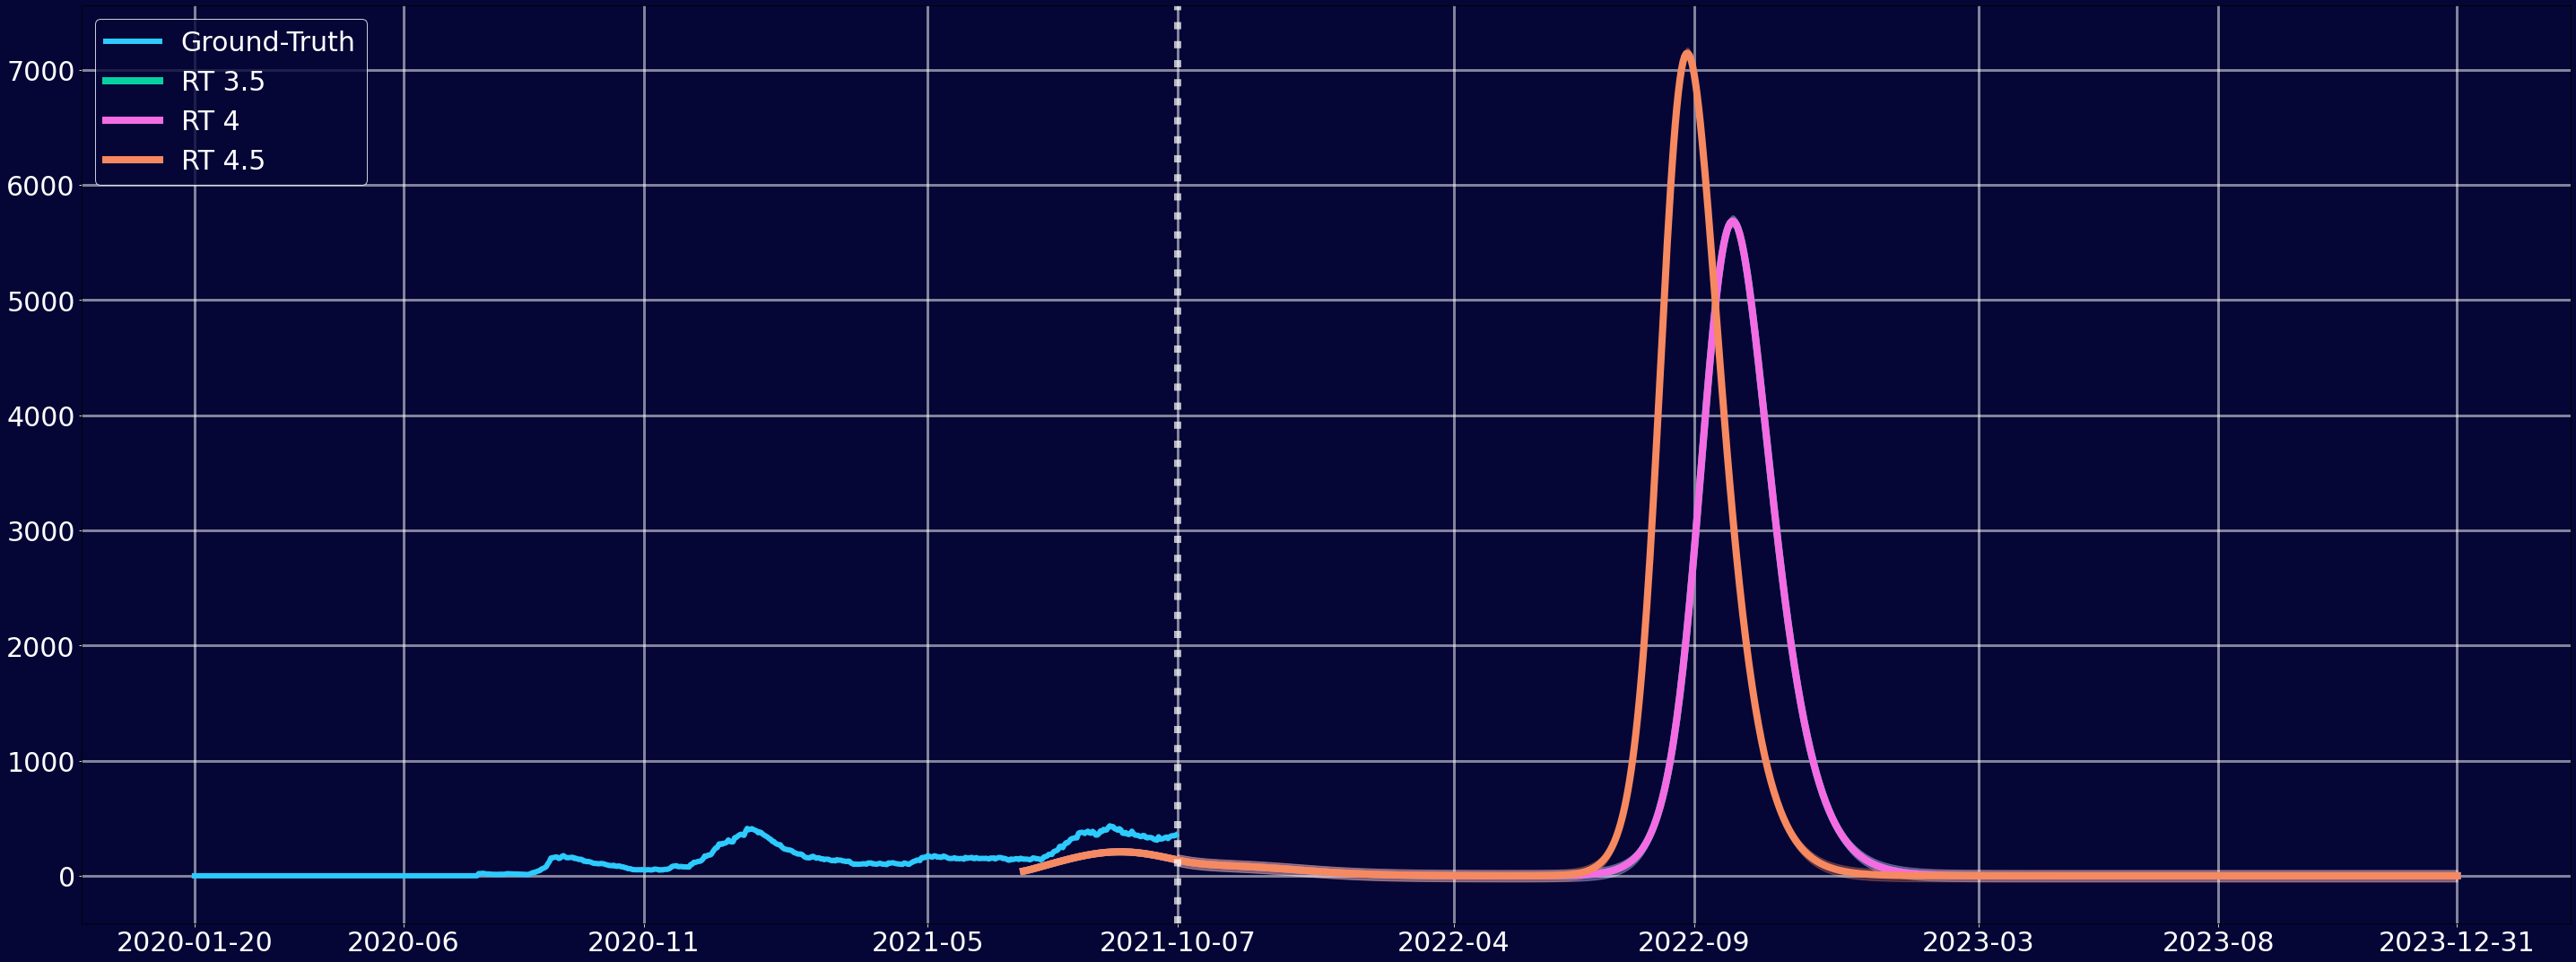

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

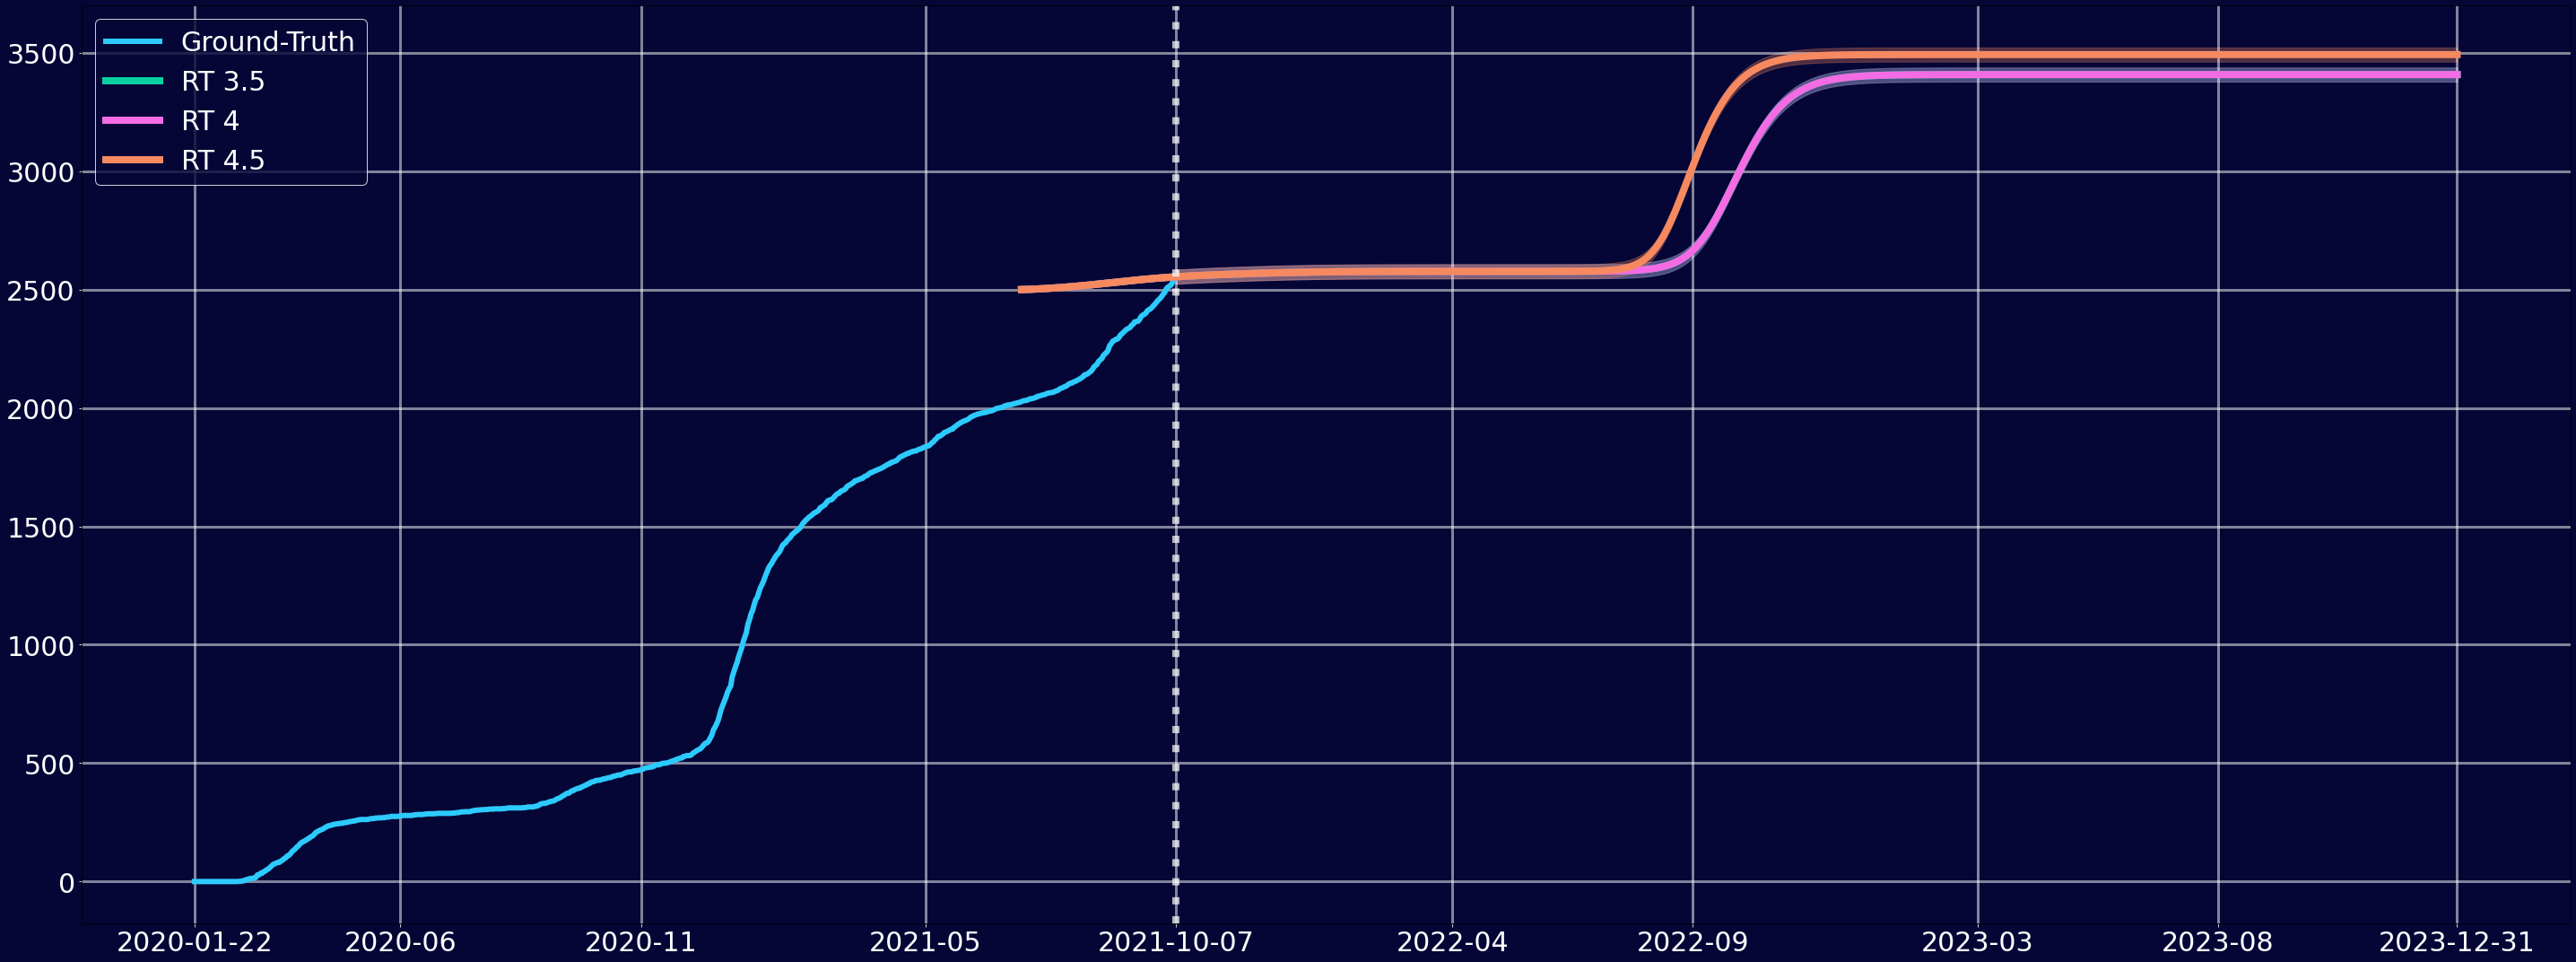

C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

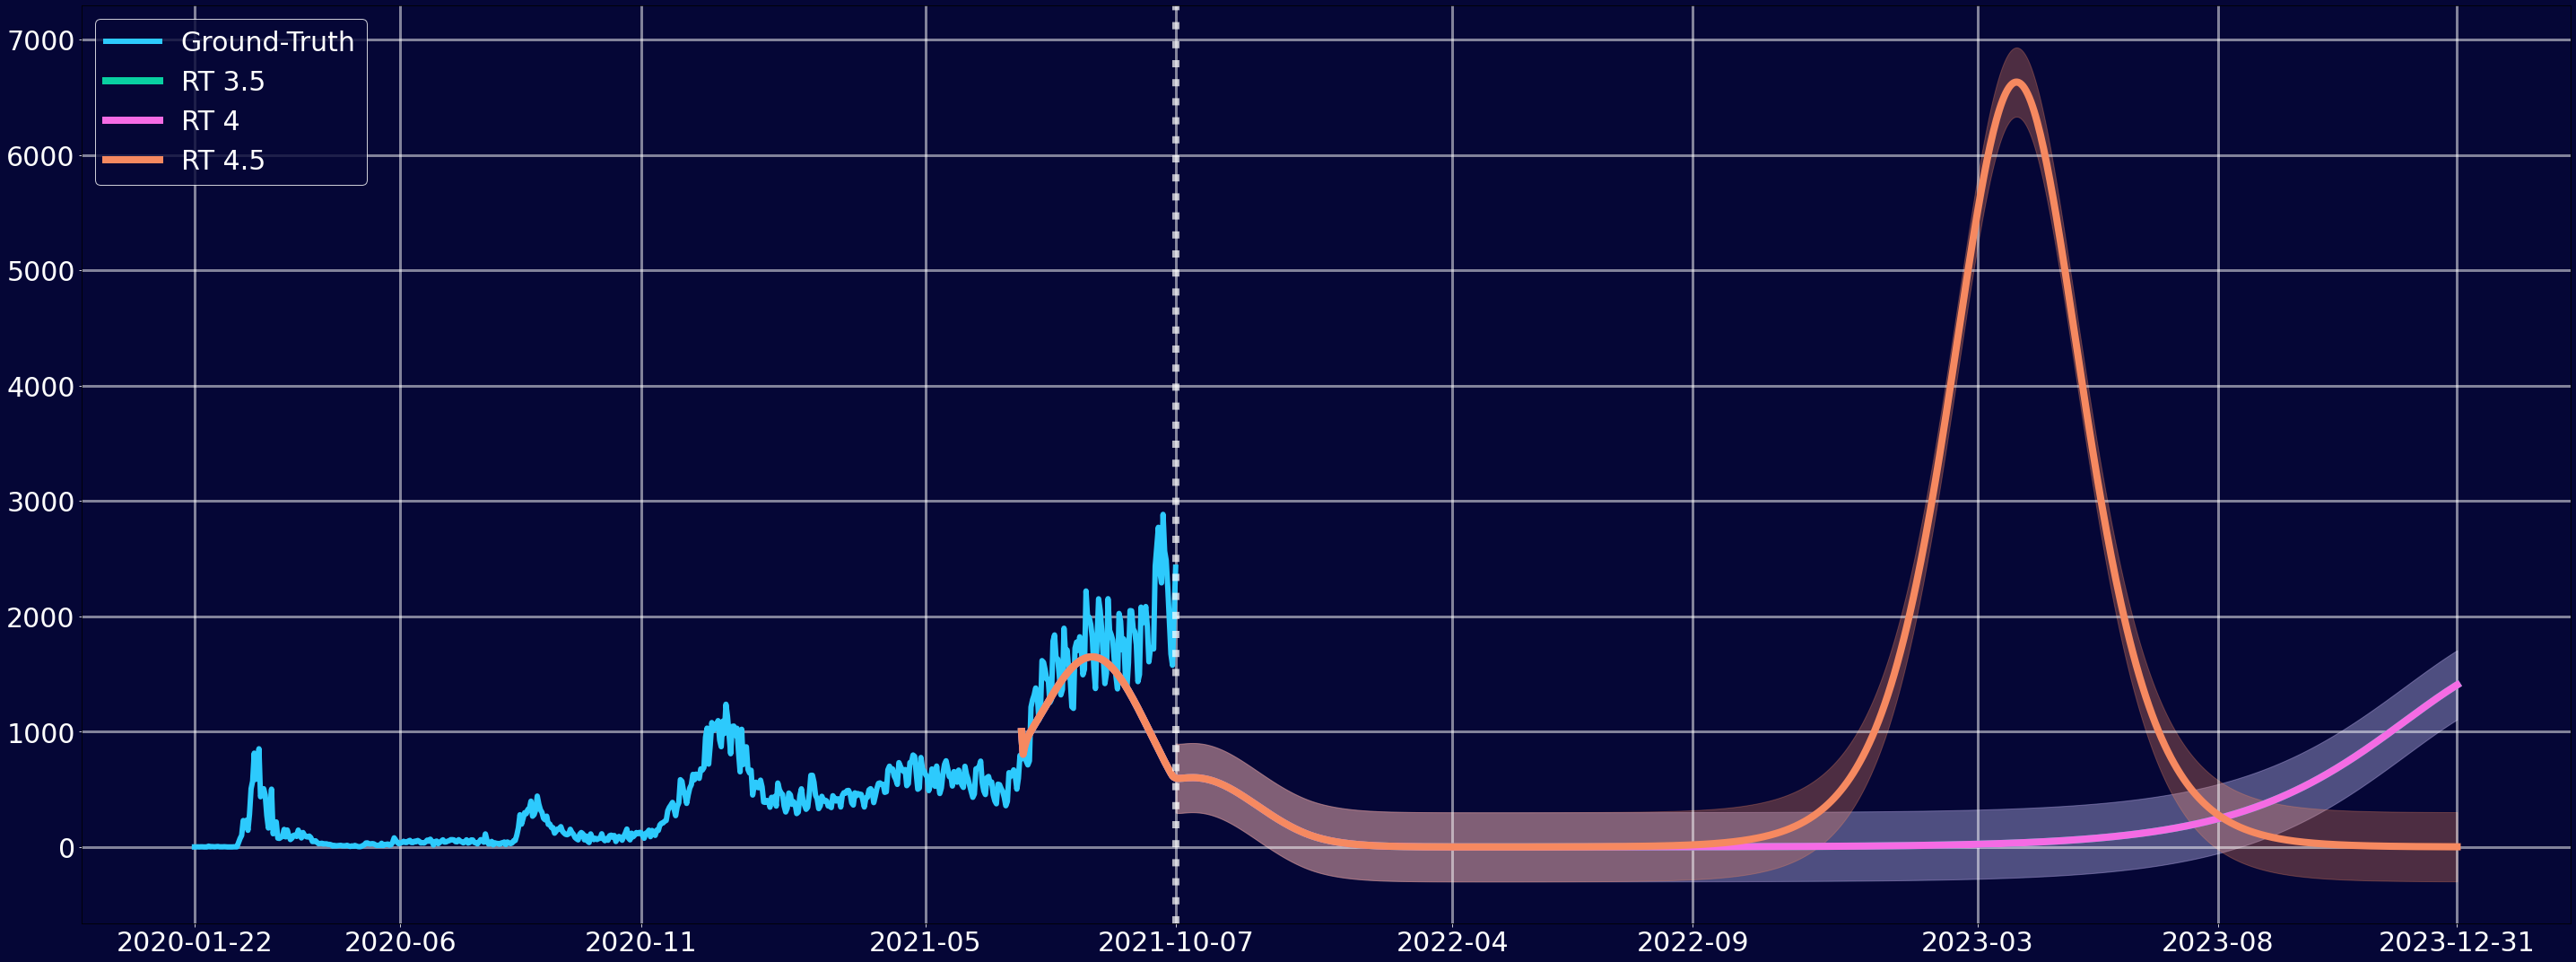

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

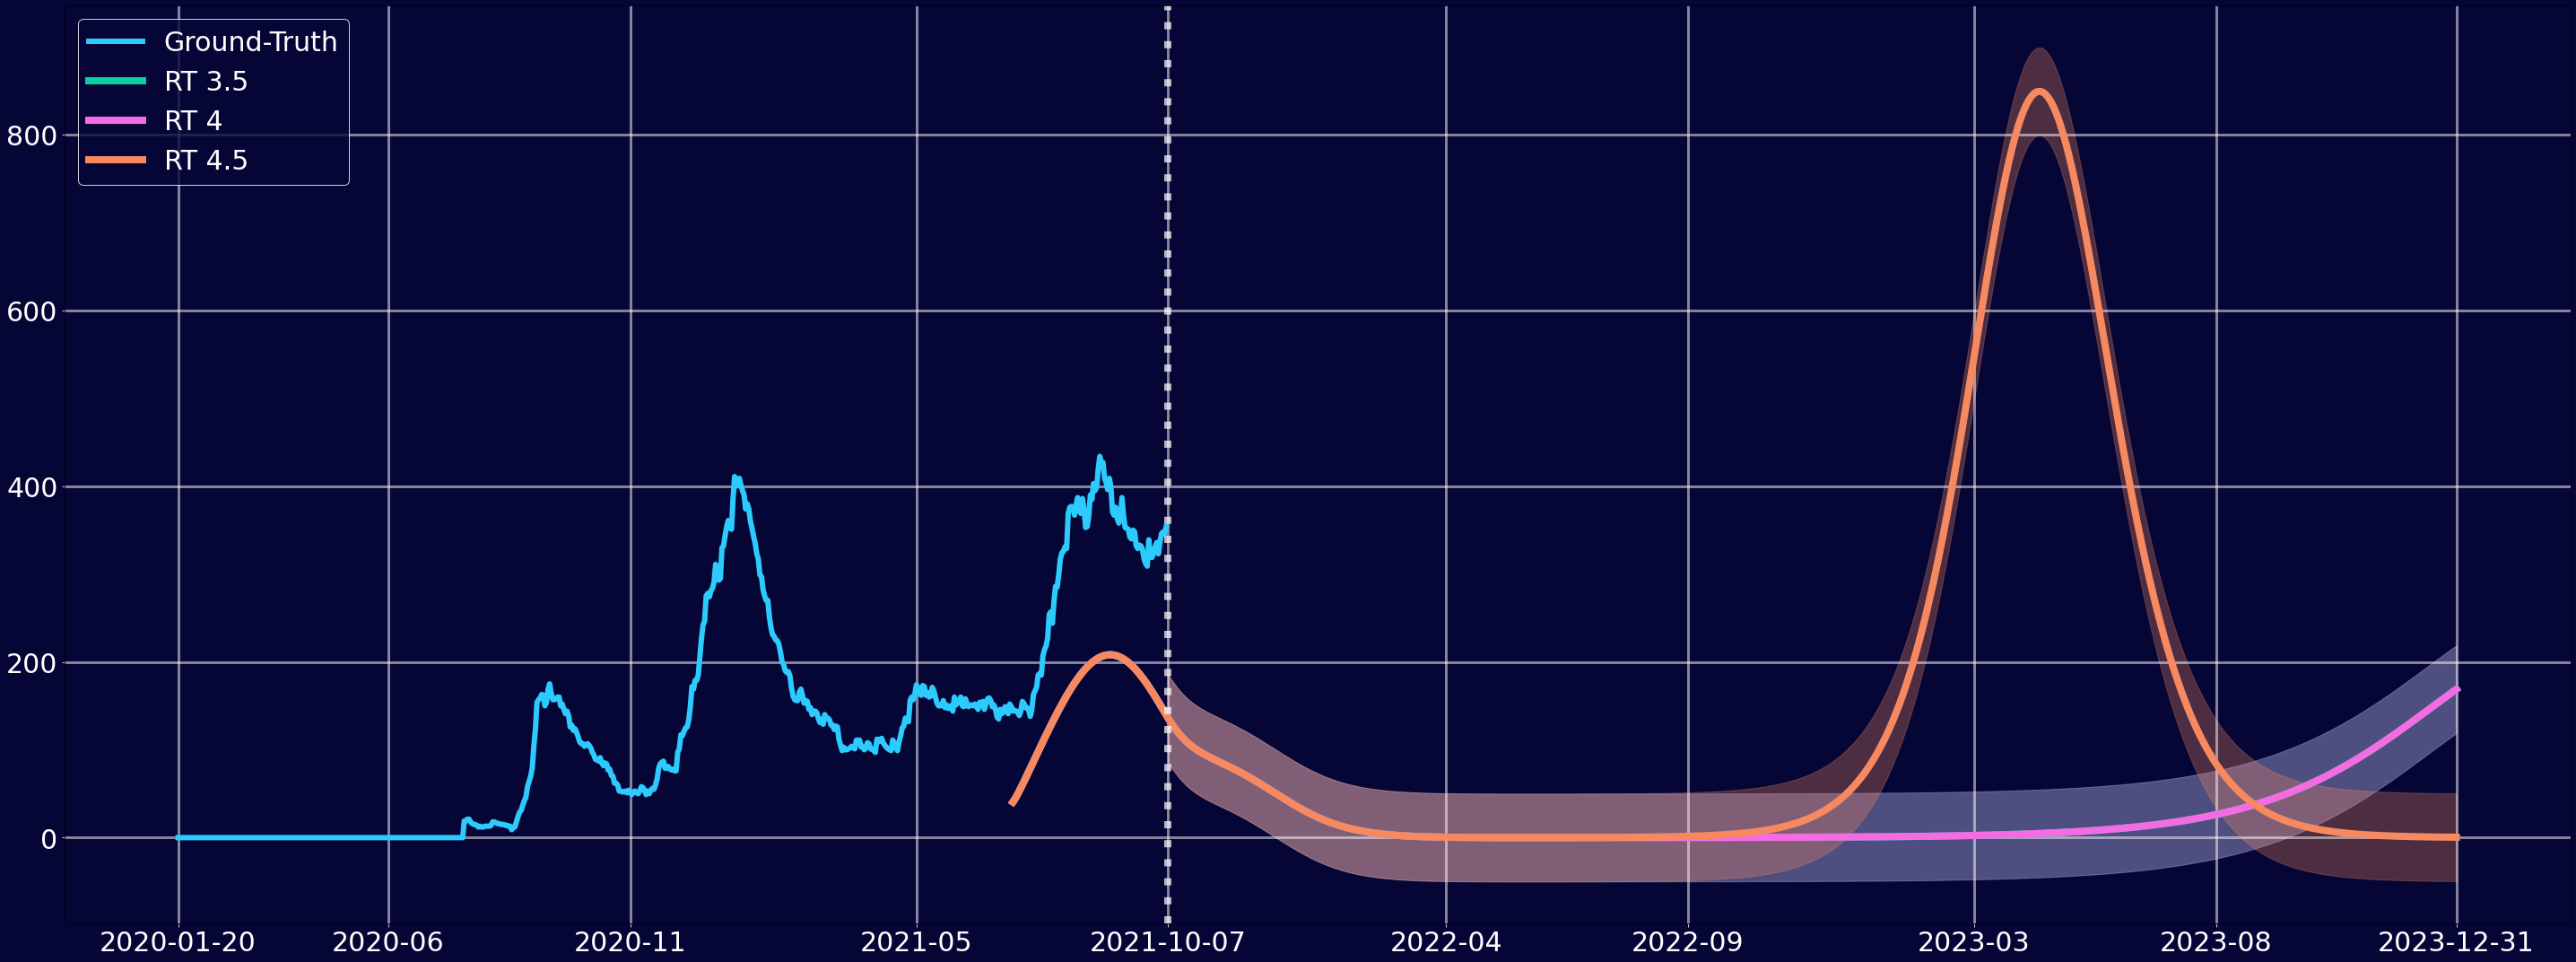

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

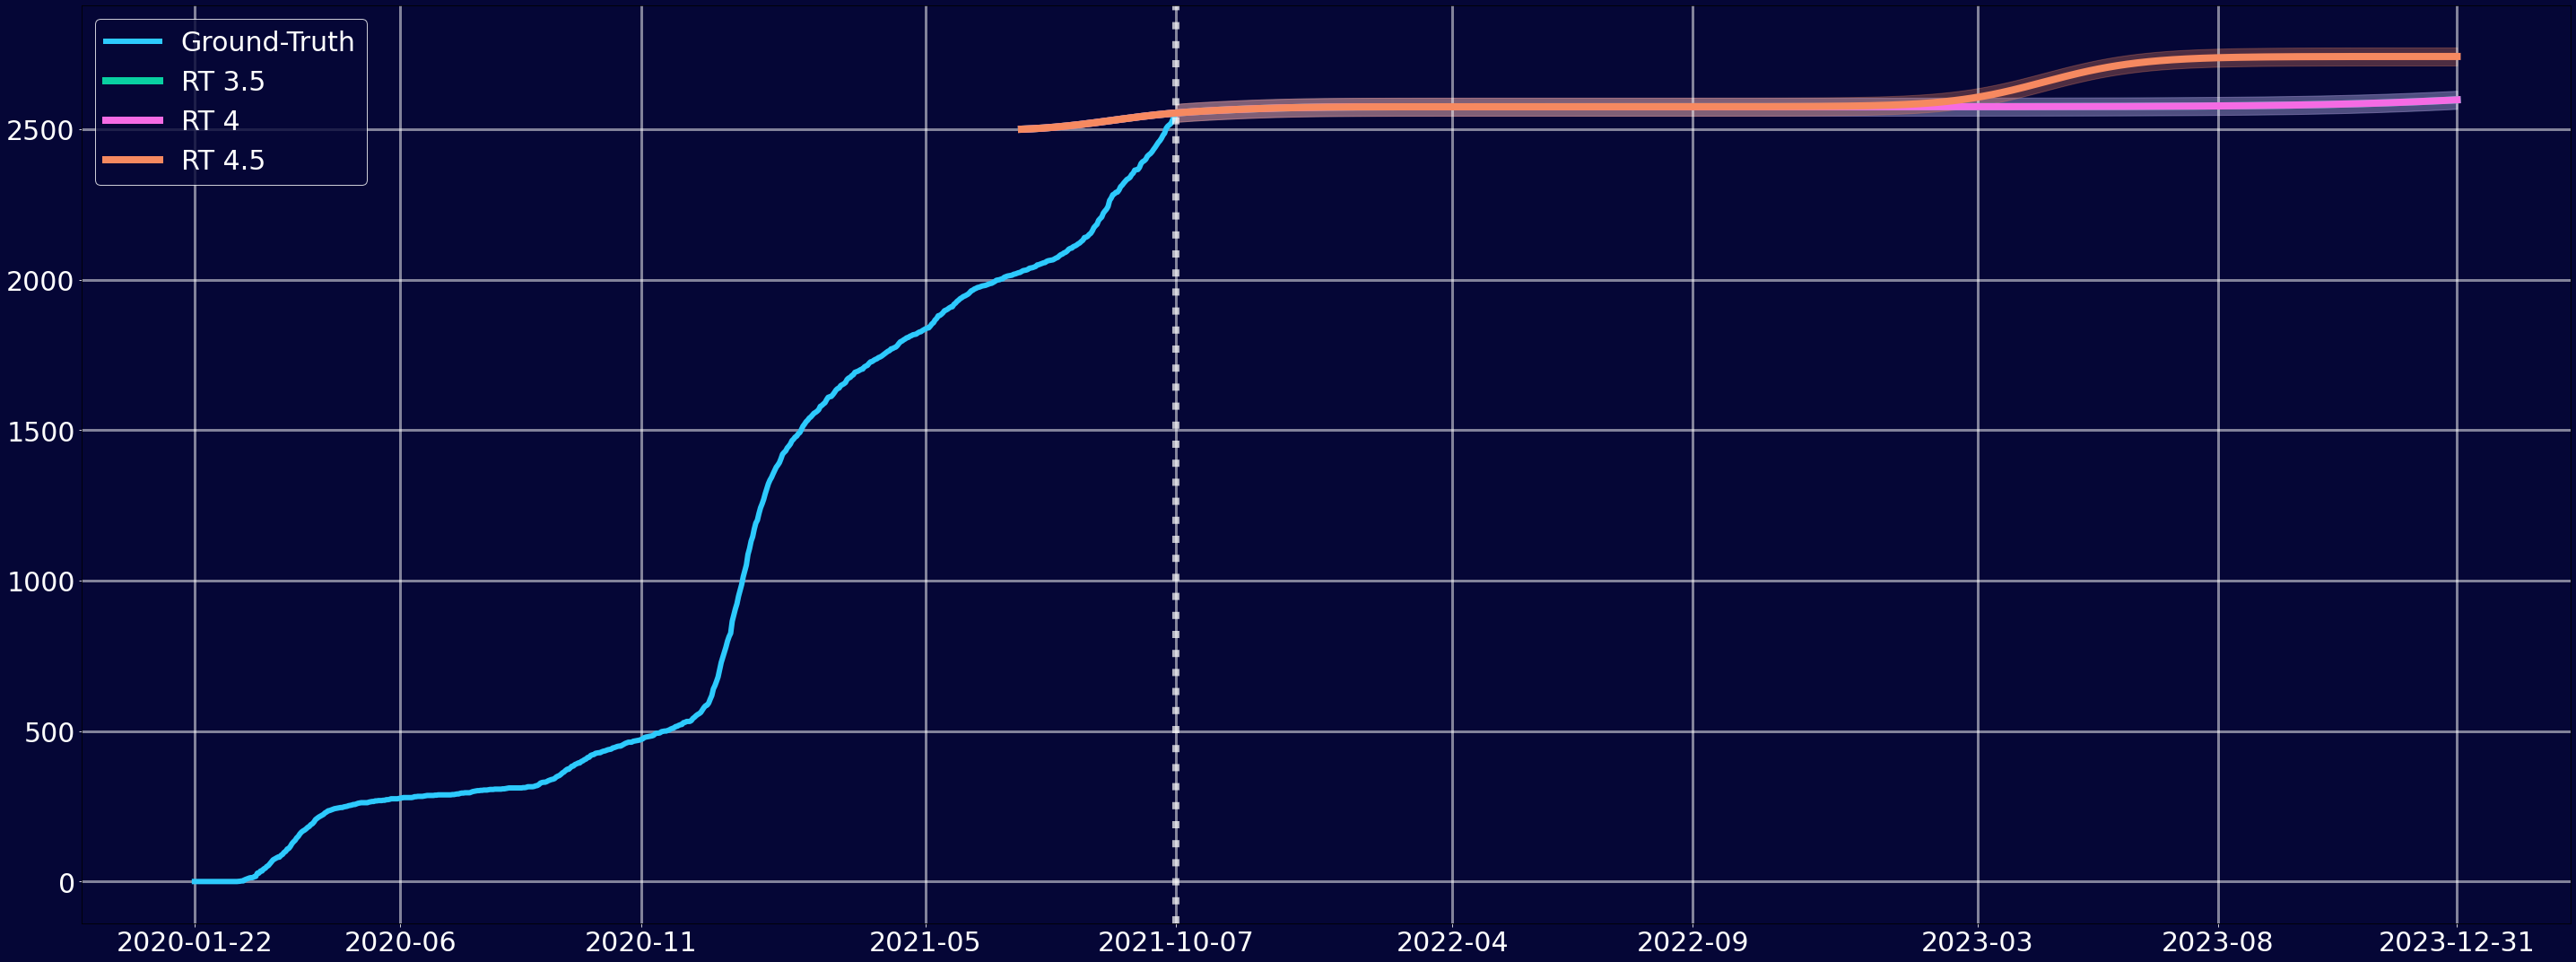

C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

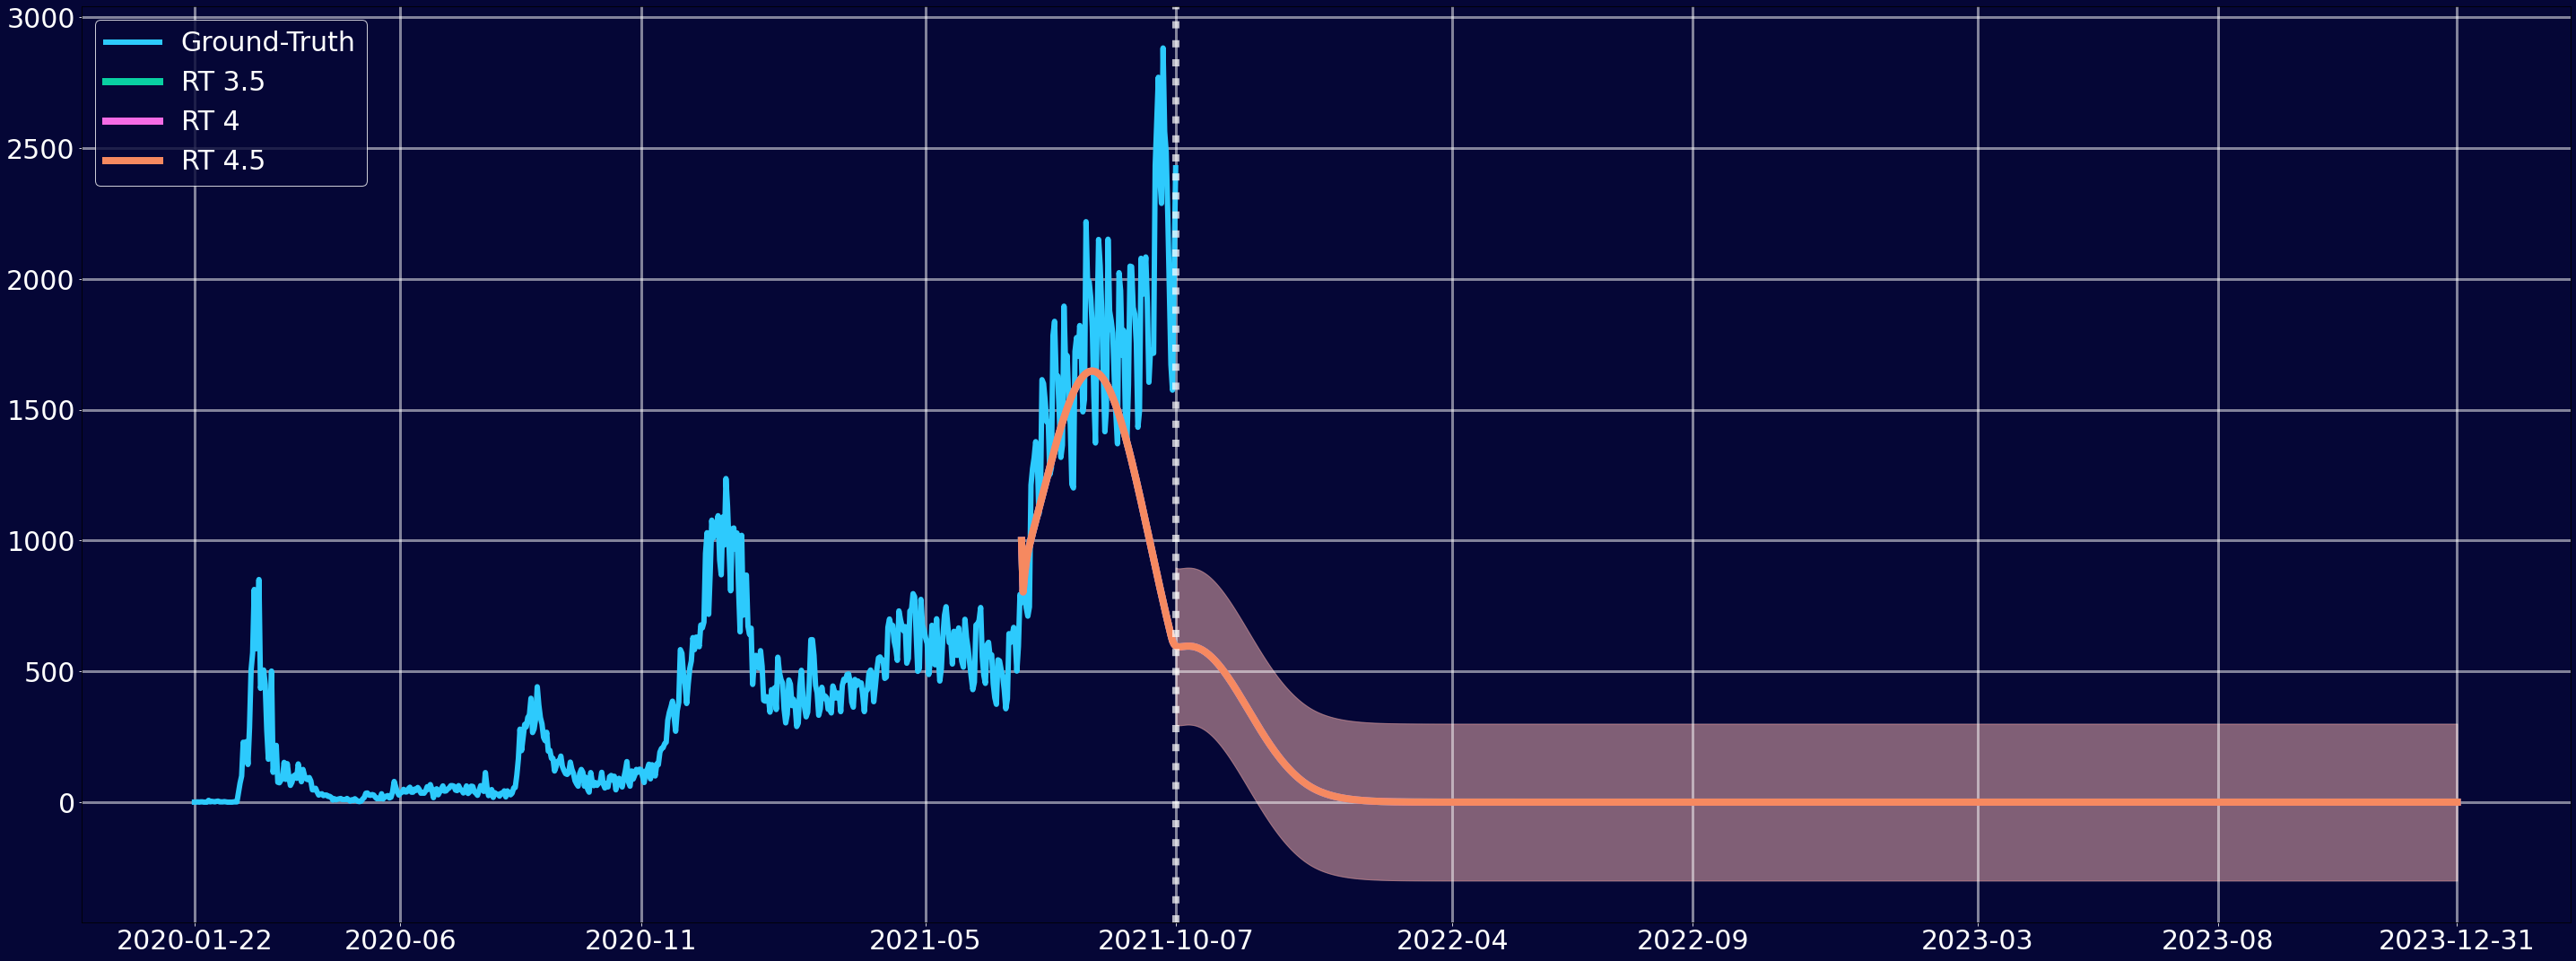

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

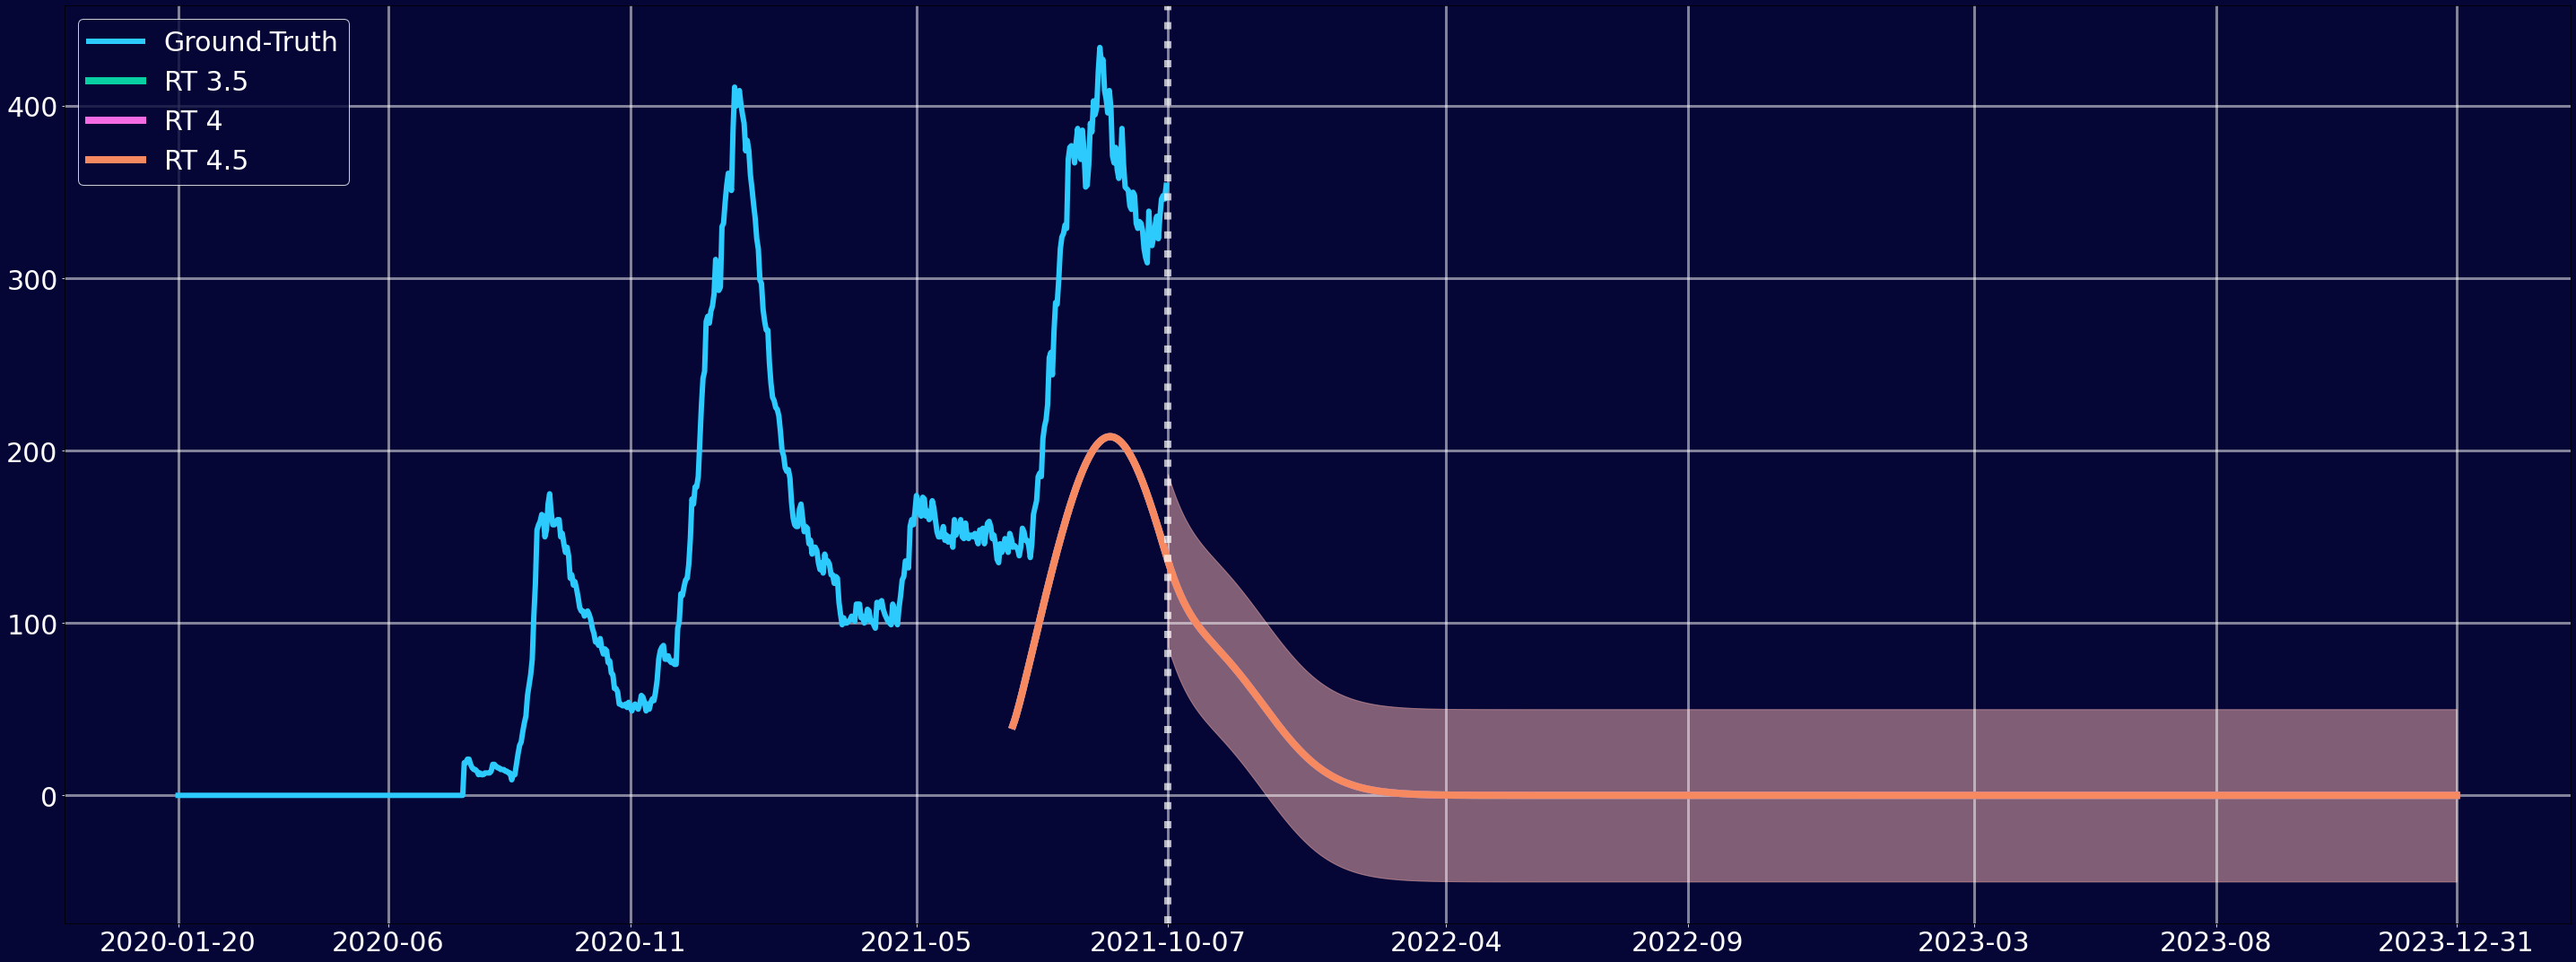

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

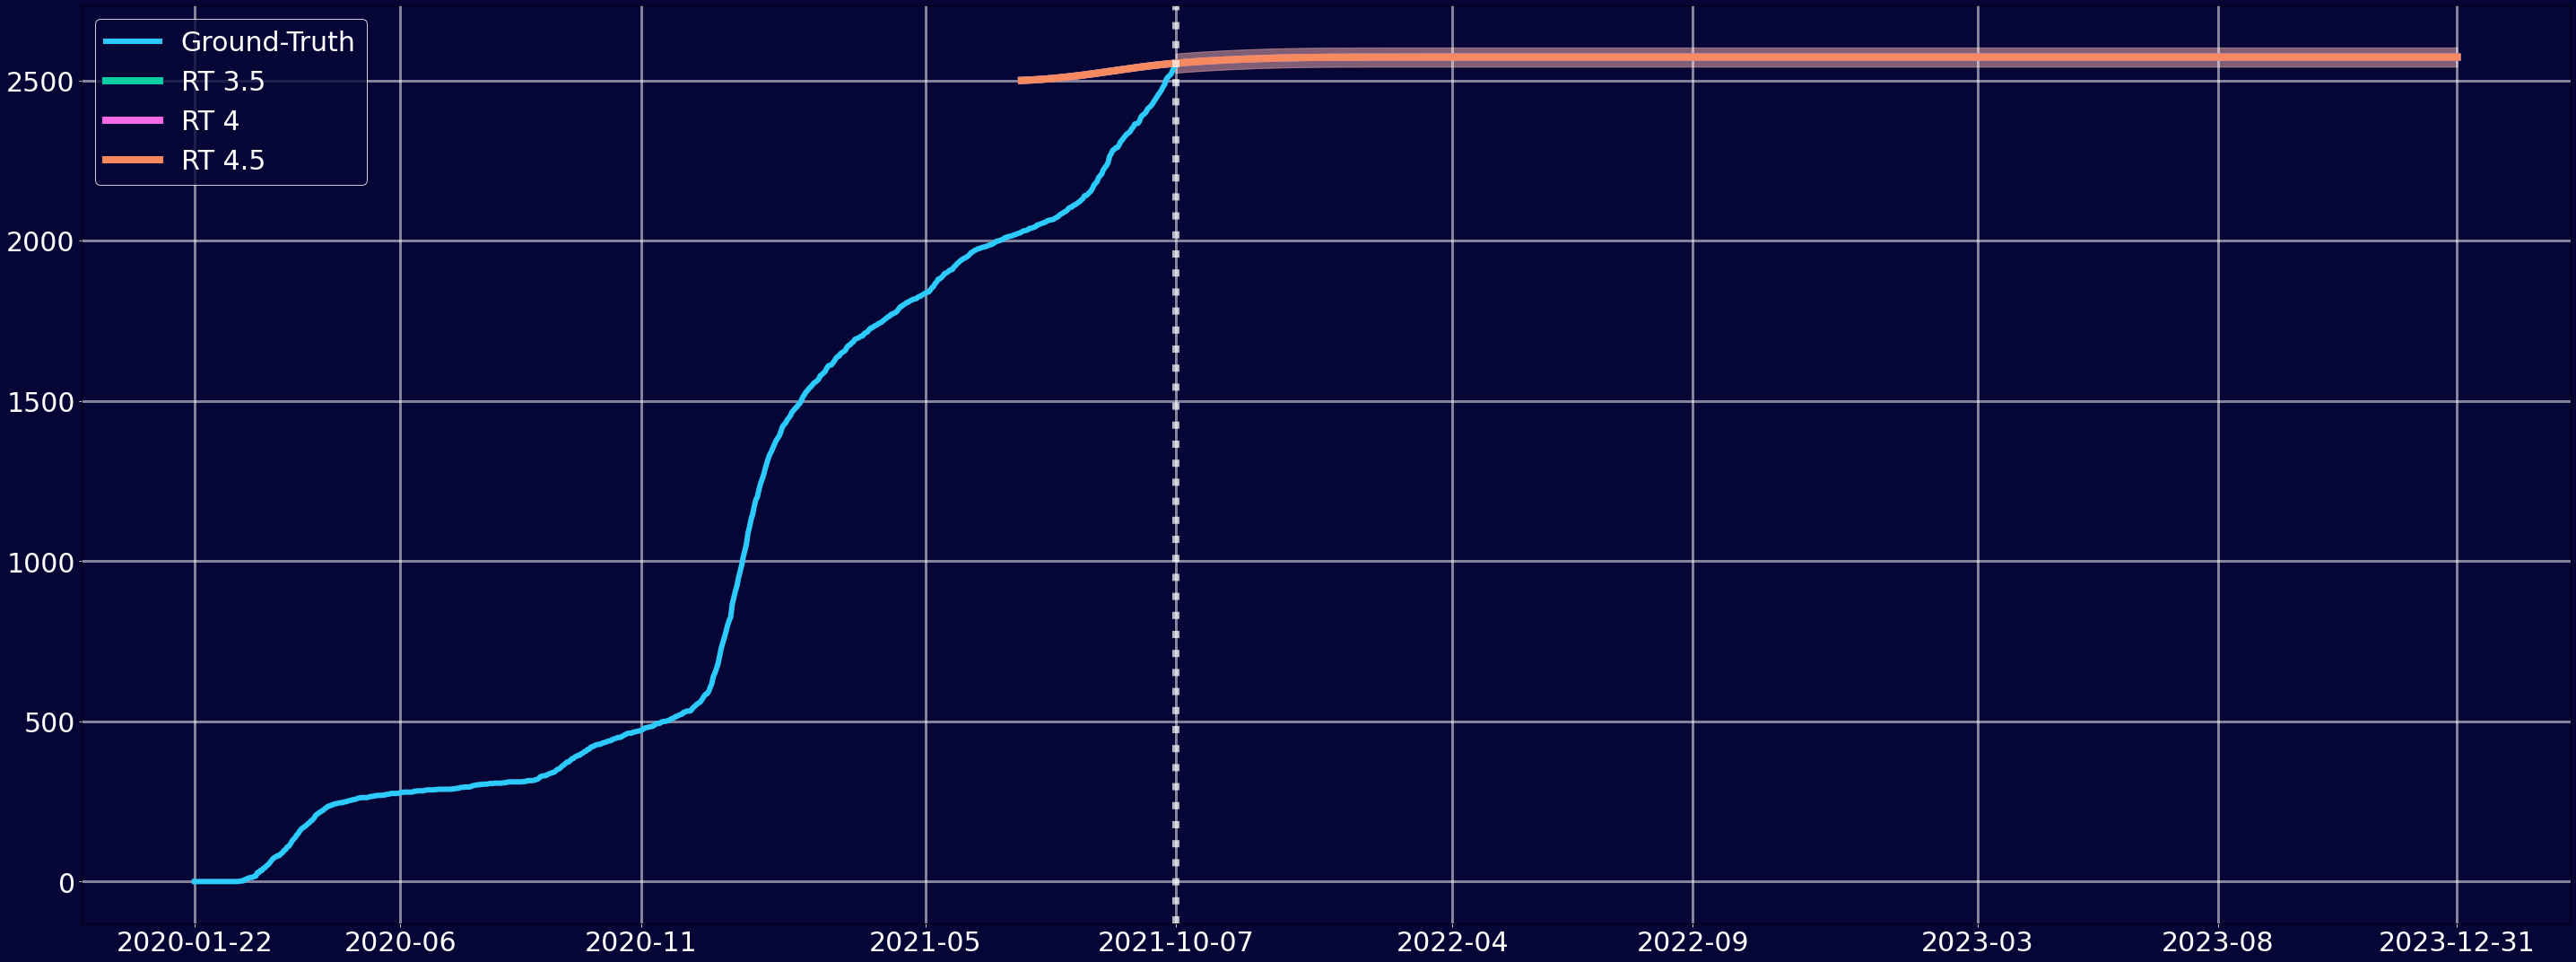

C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

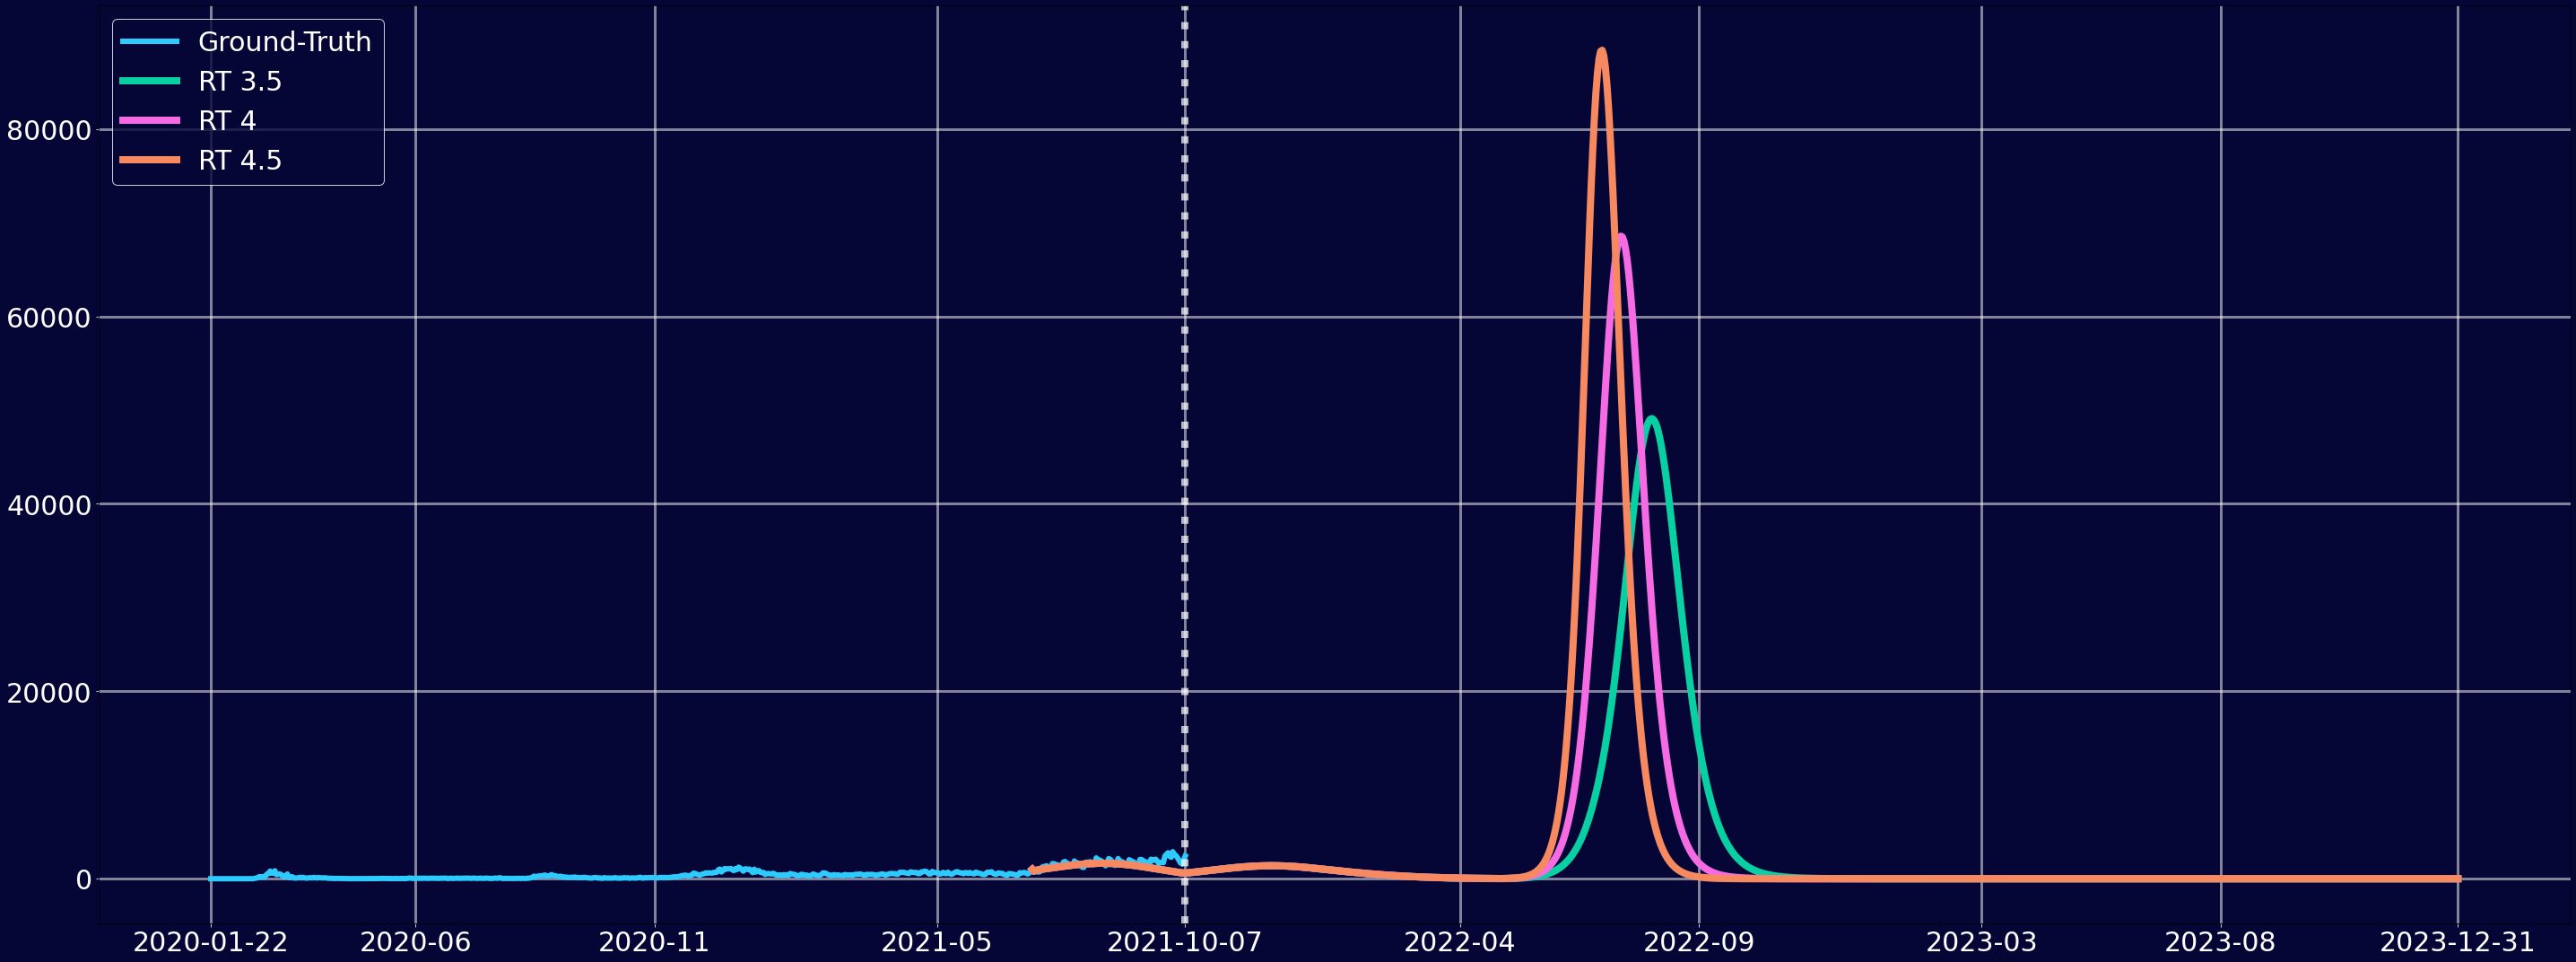

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

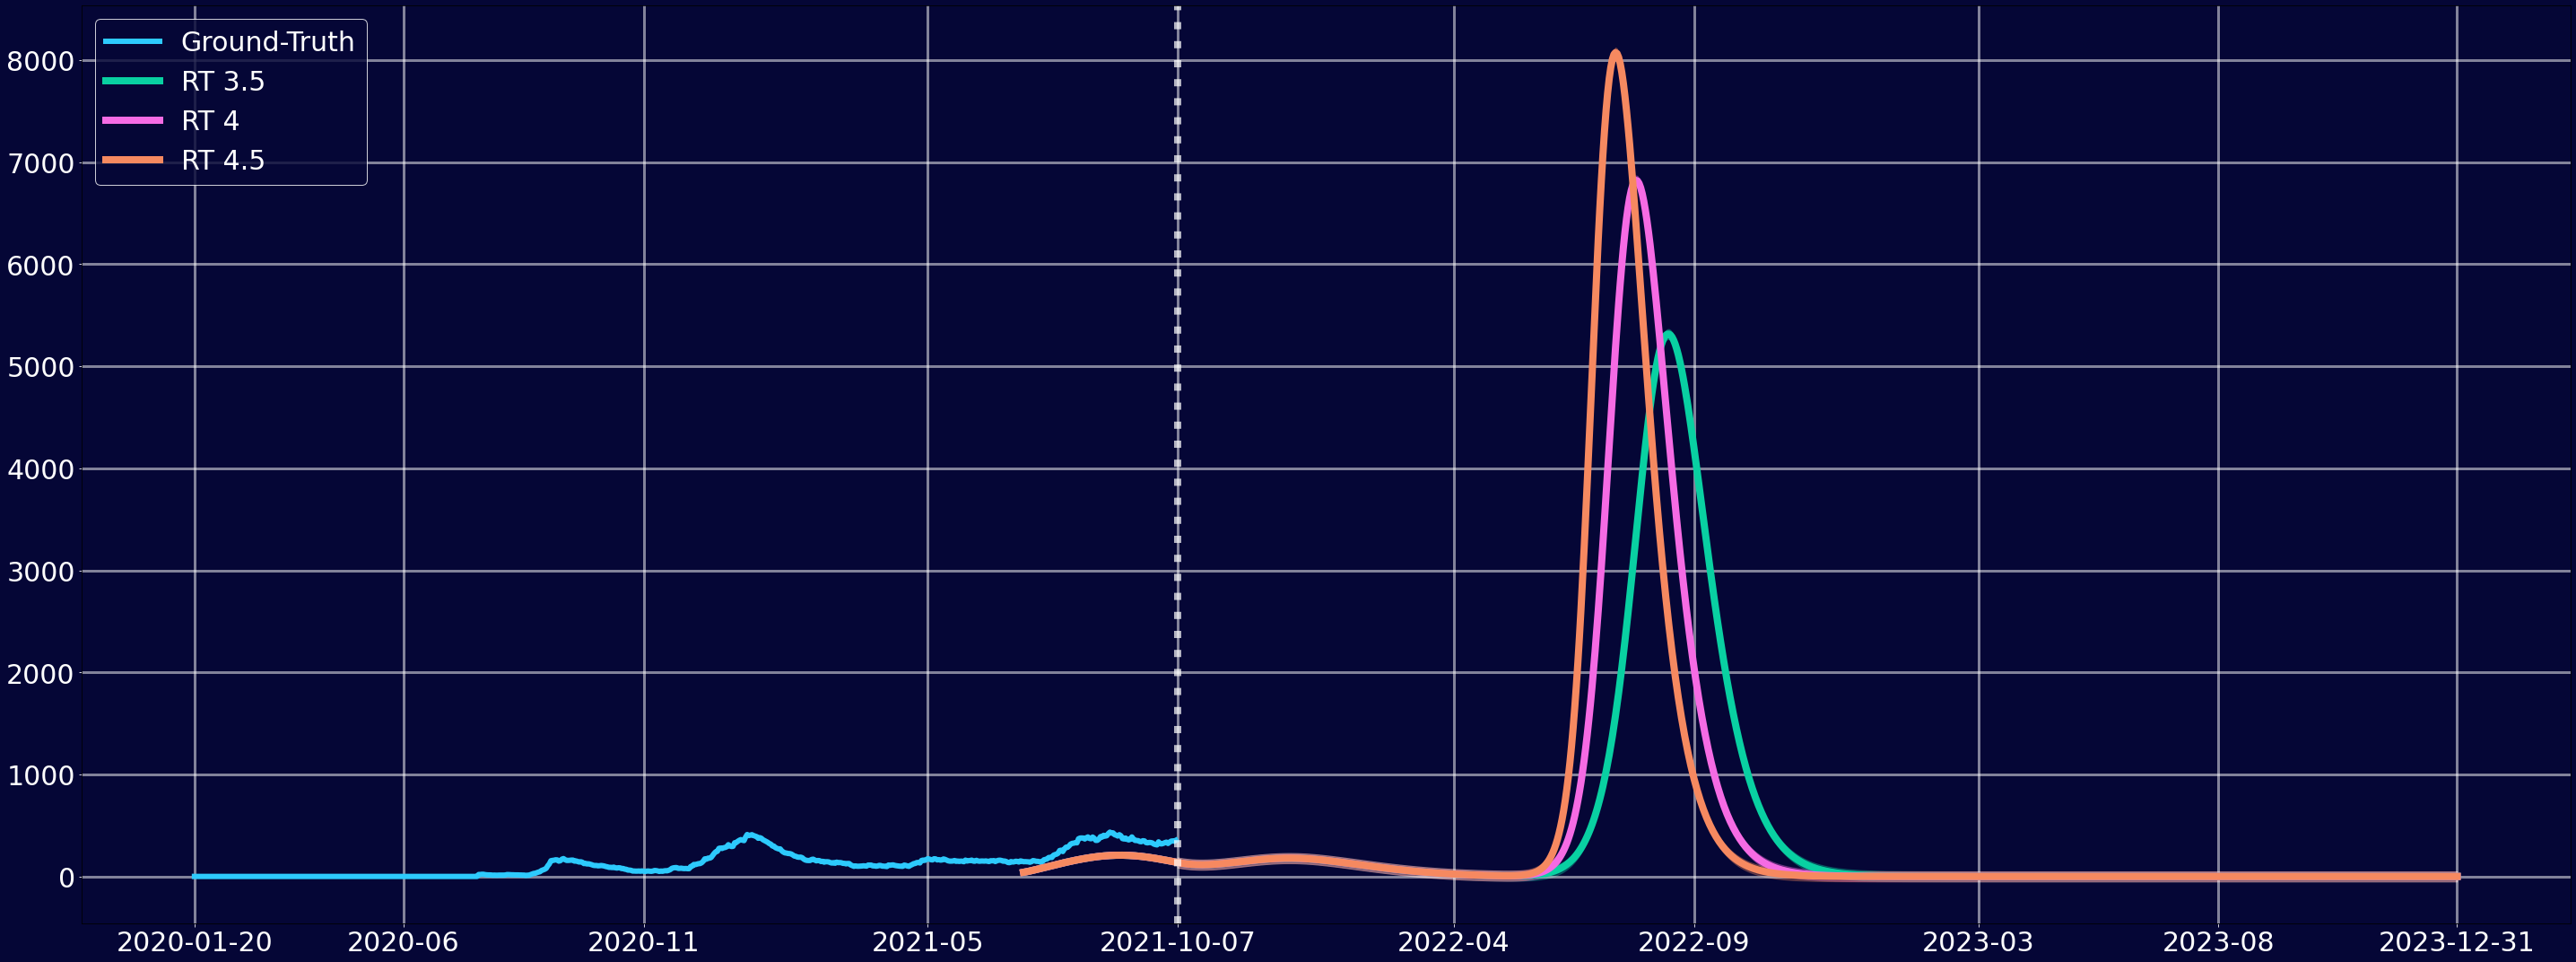

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

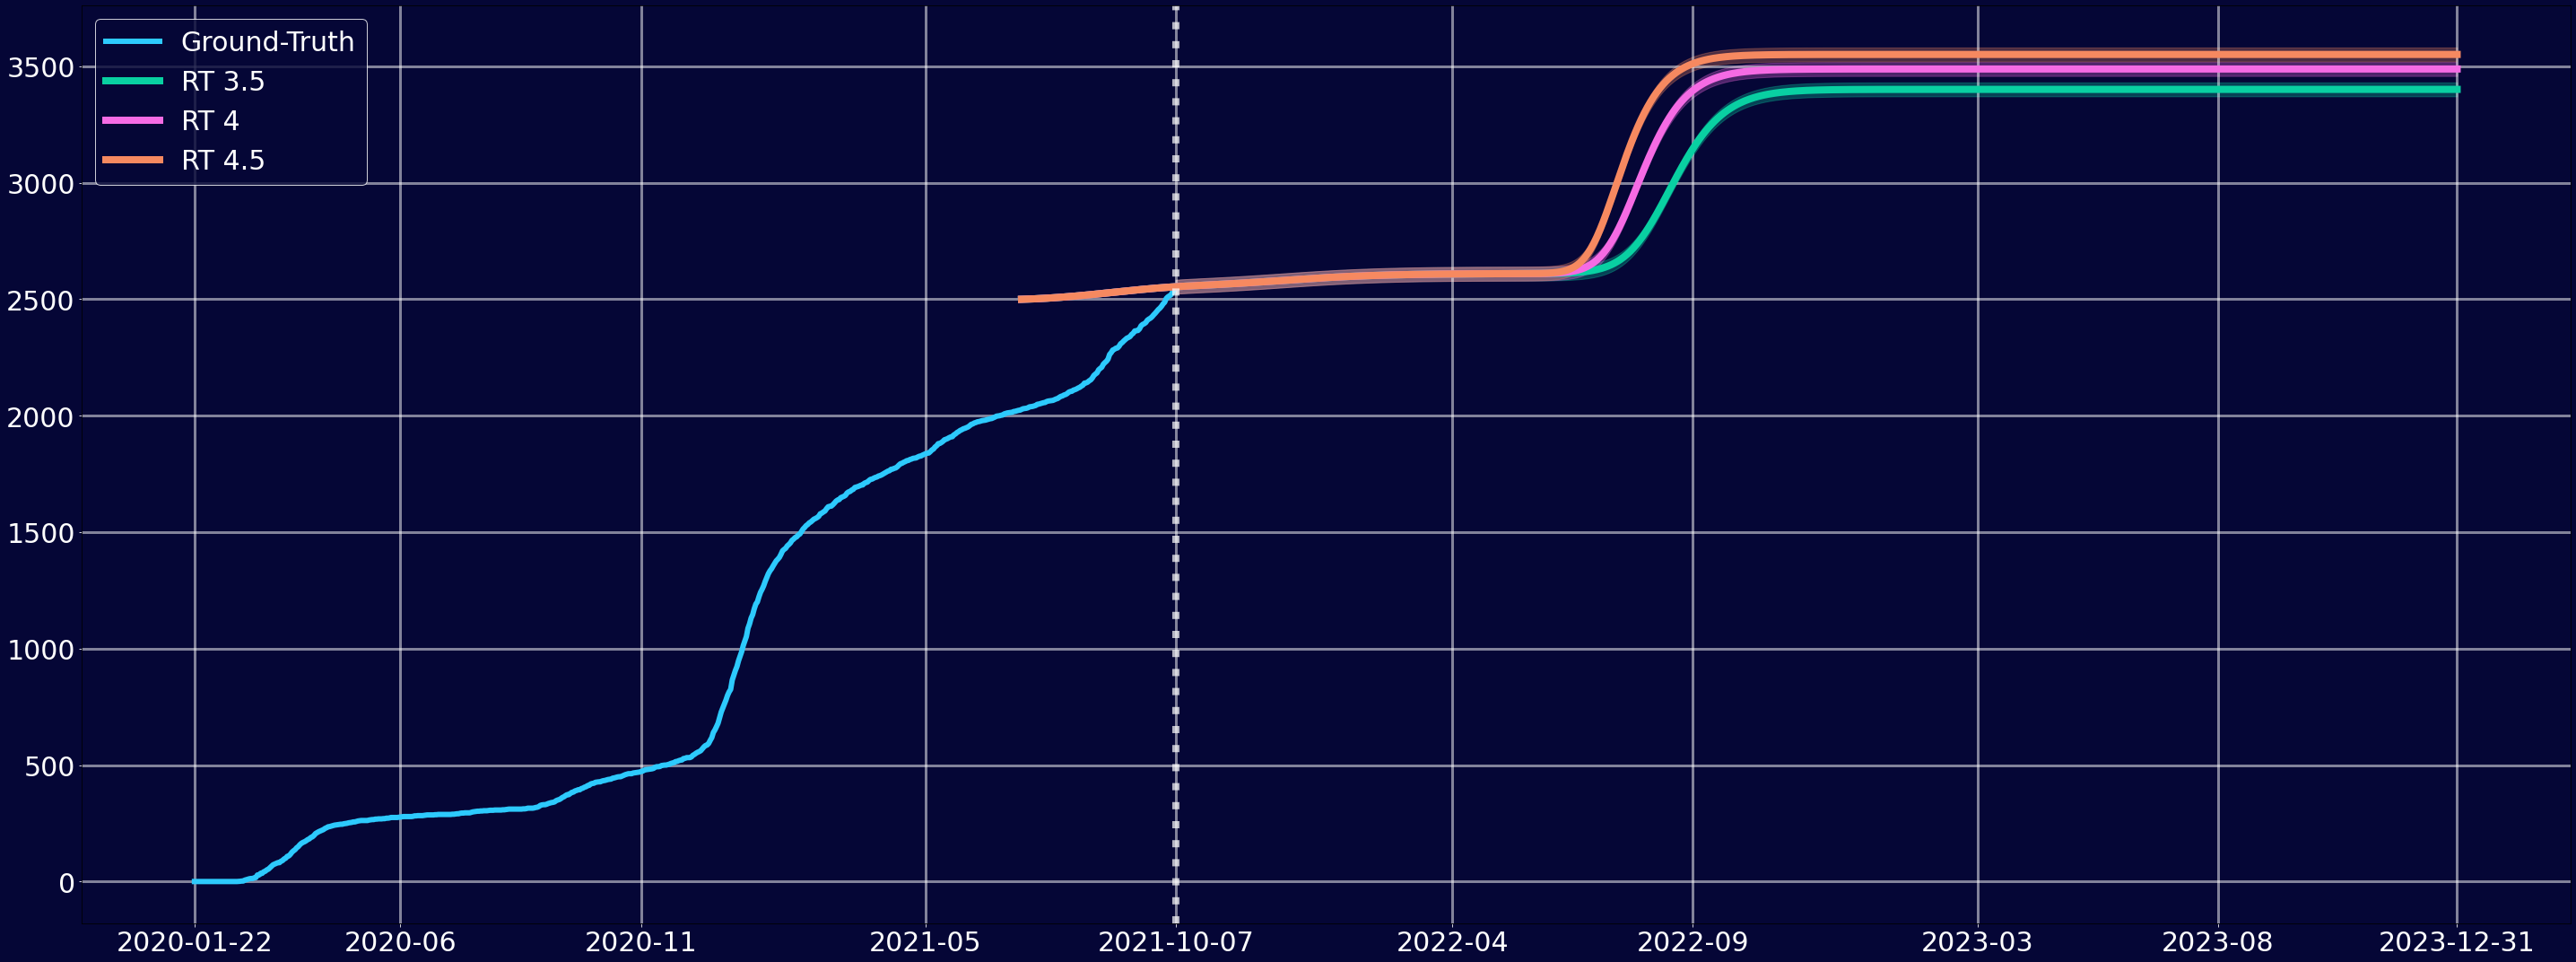

C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

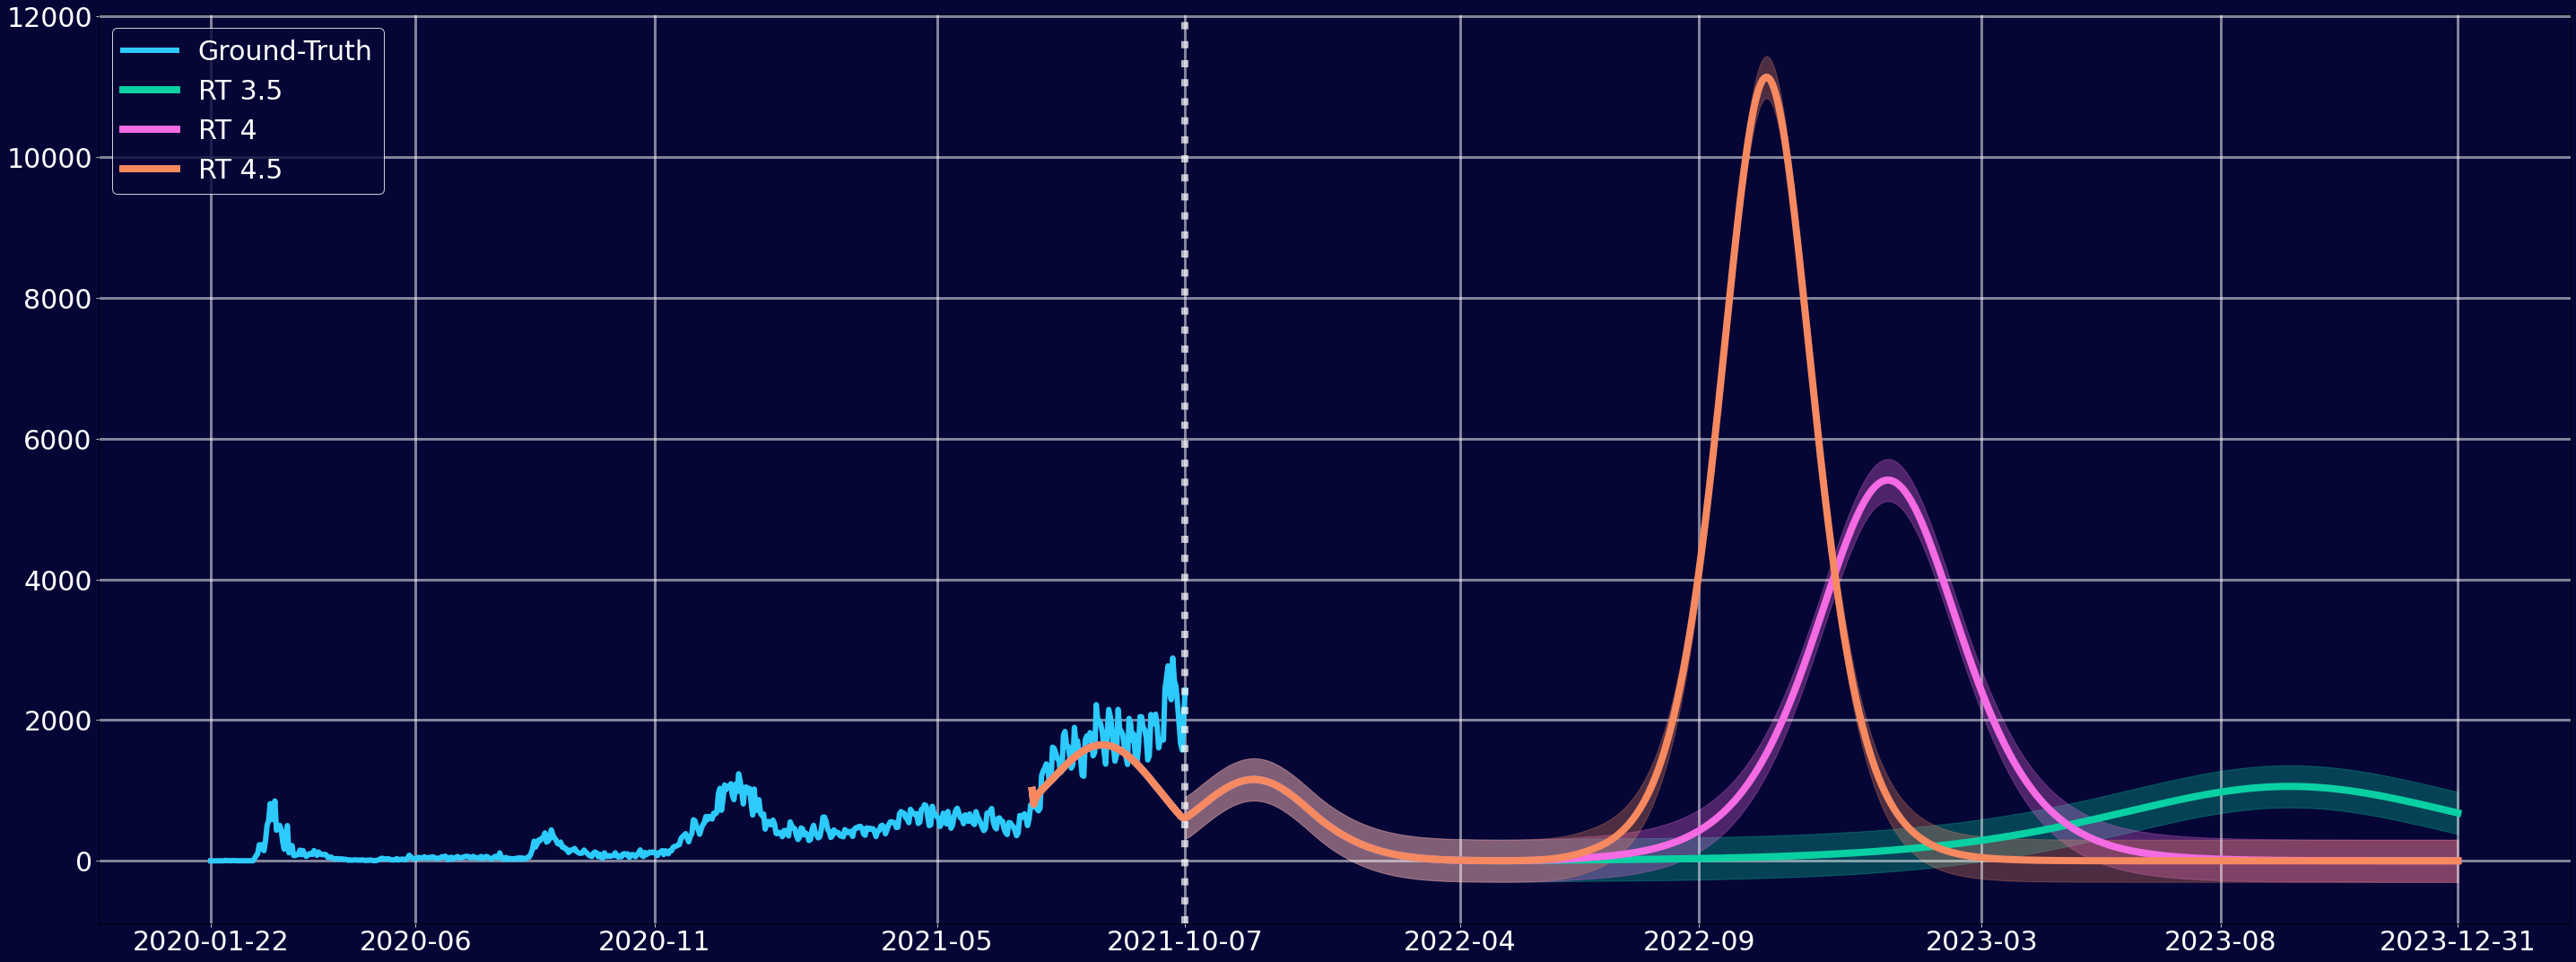

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

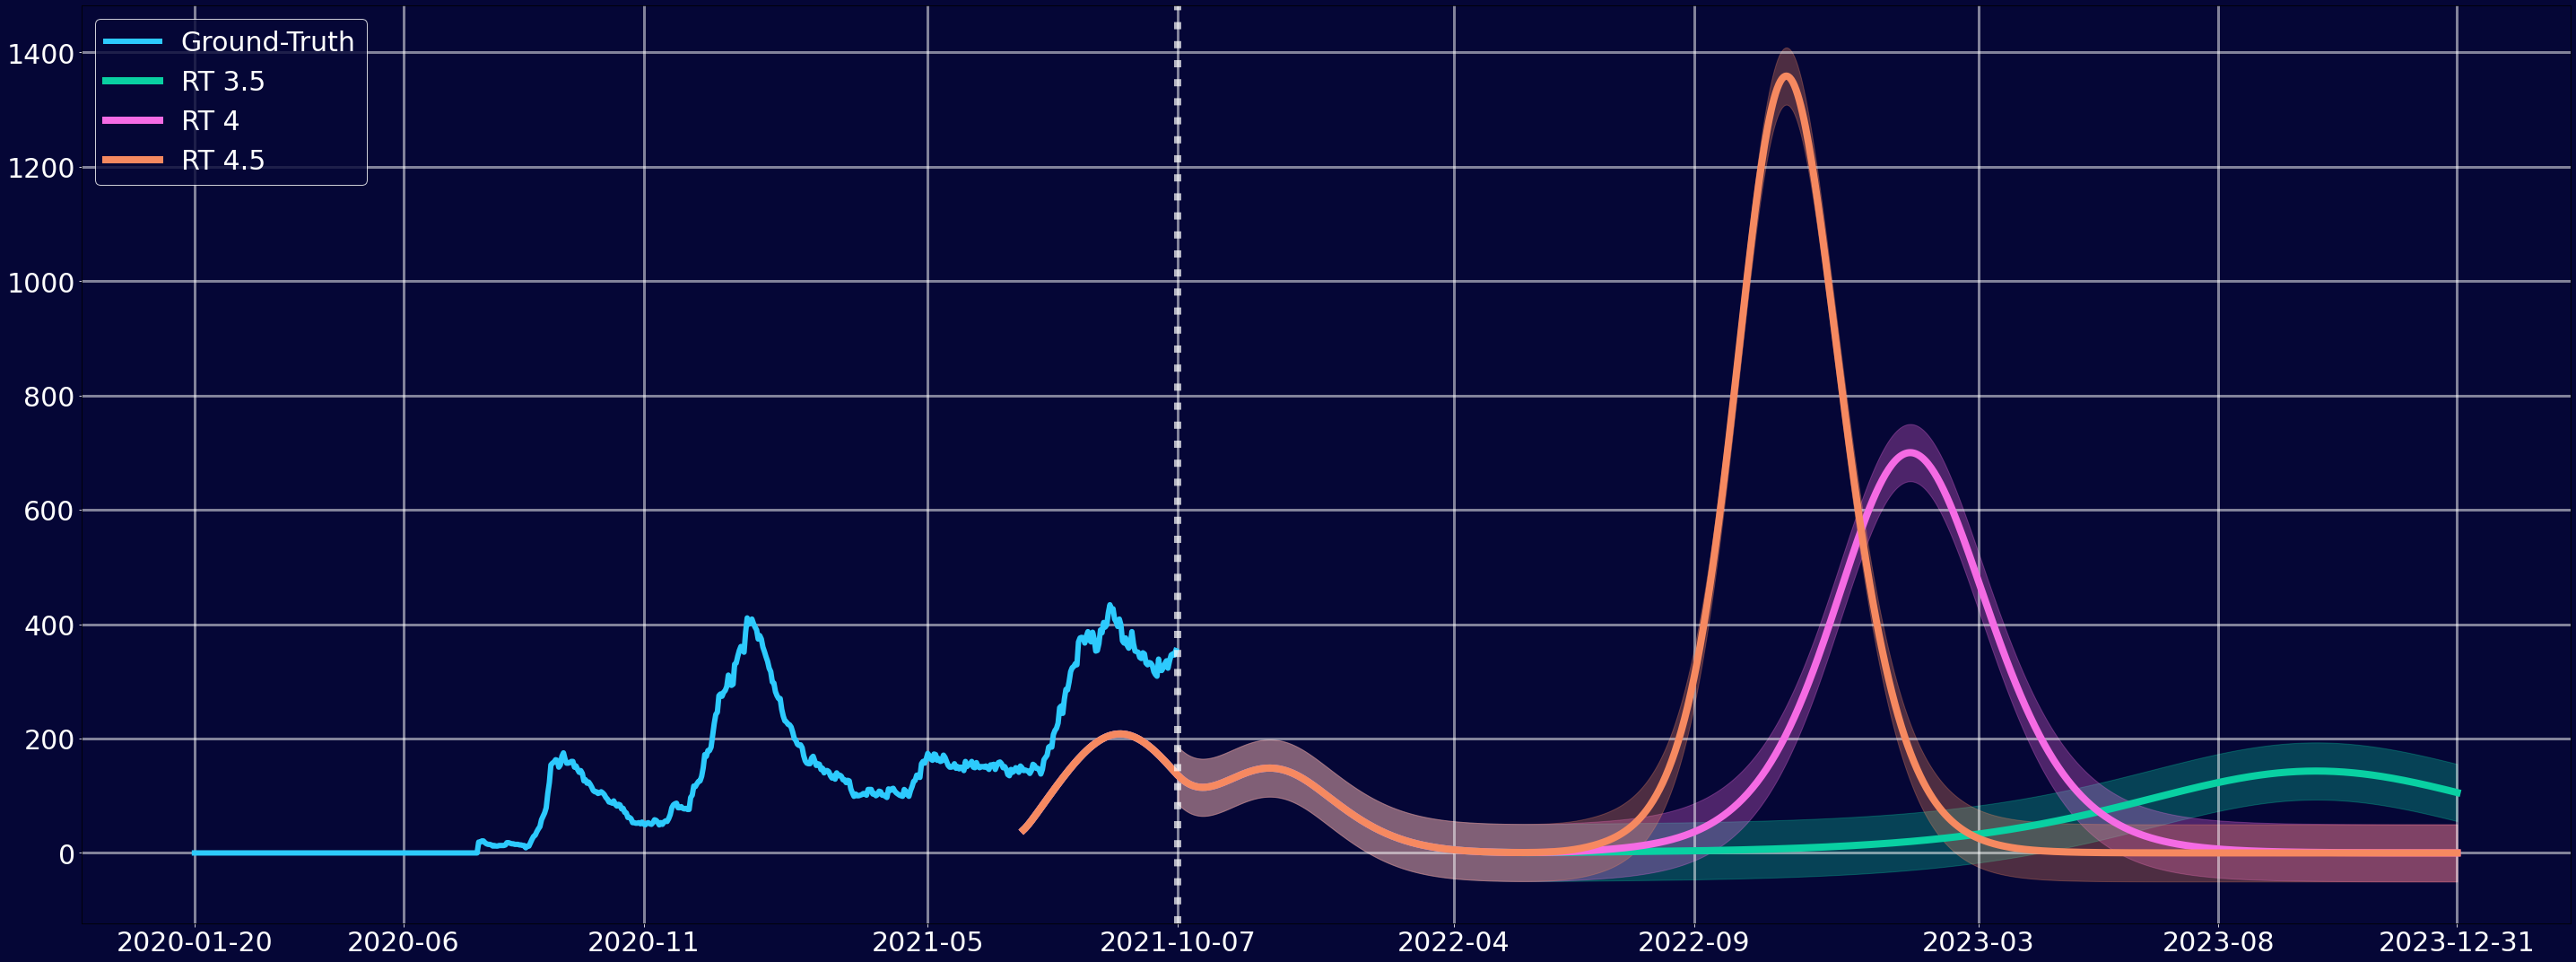

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

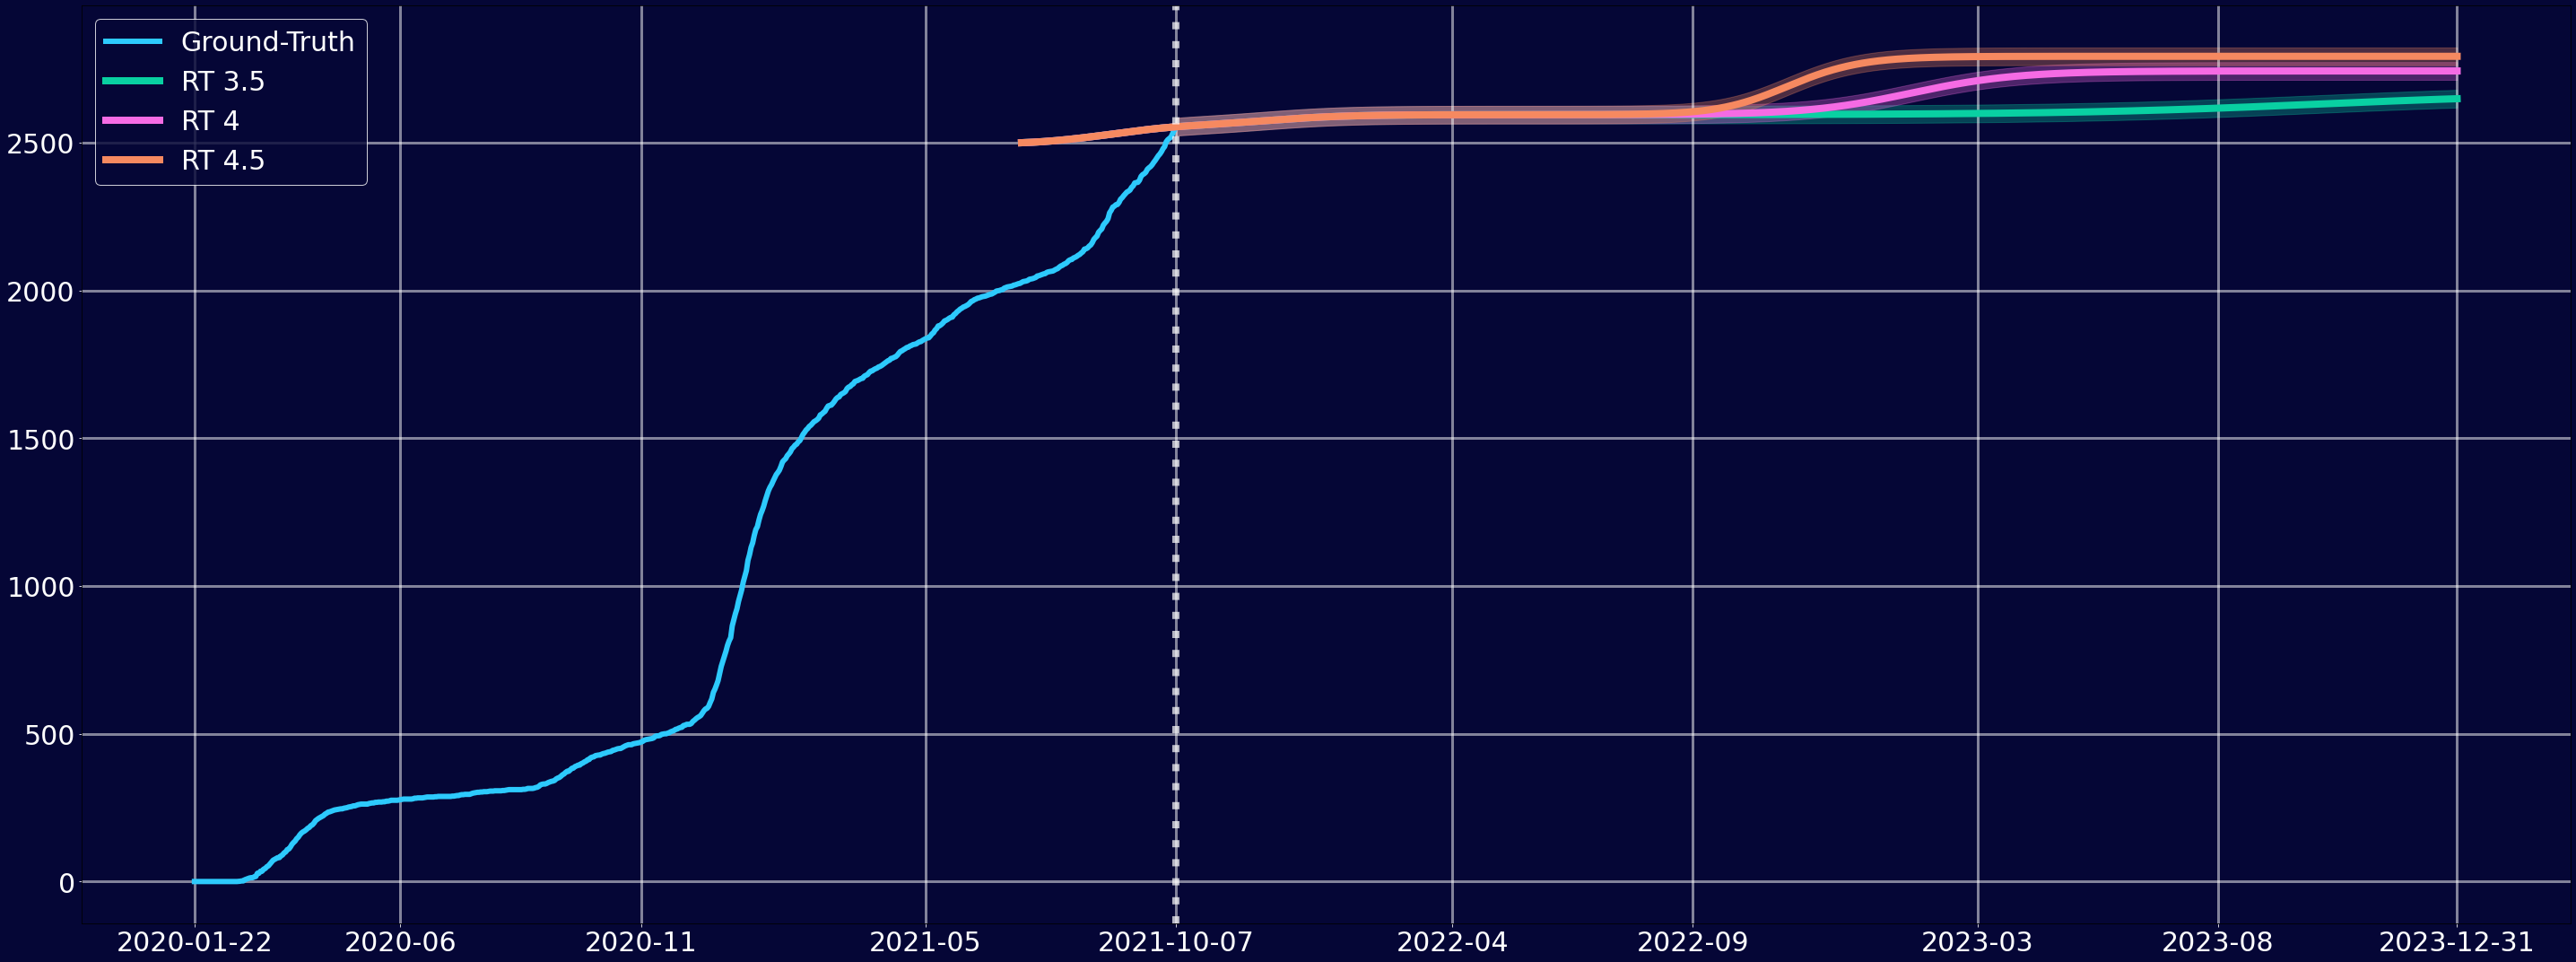

C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/1649091992.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

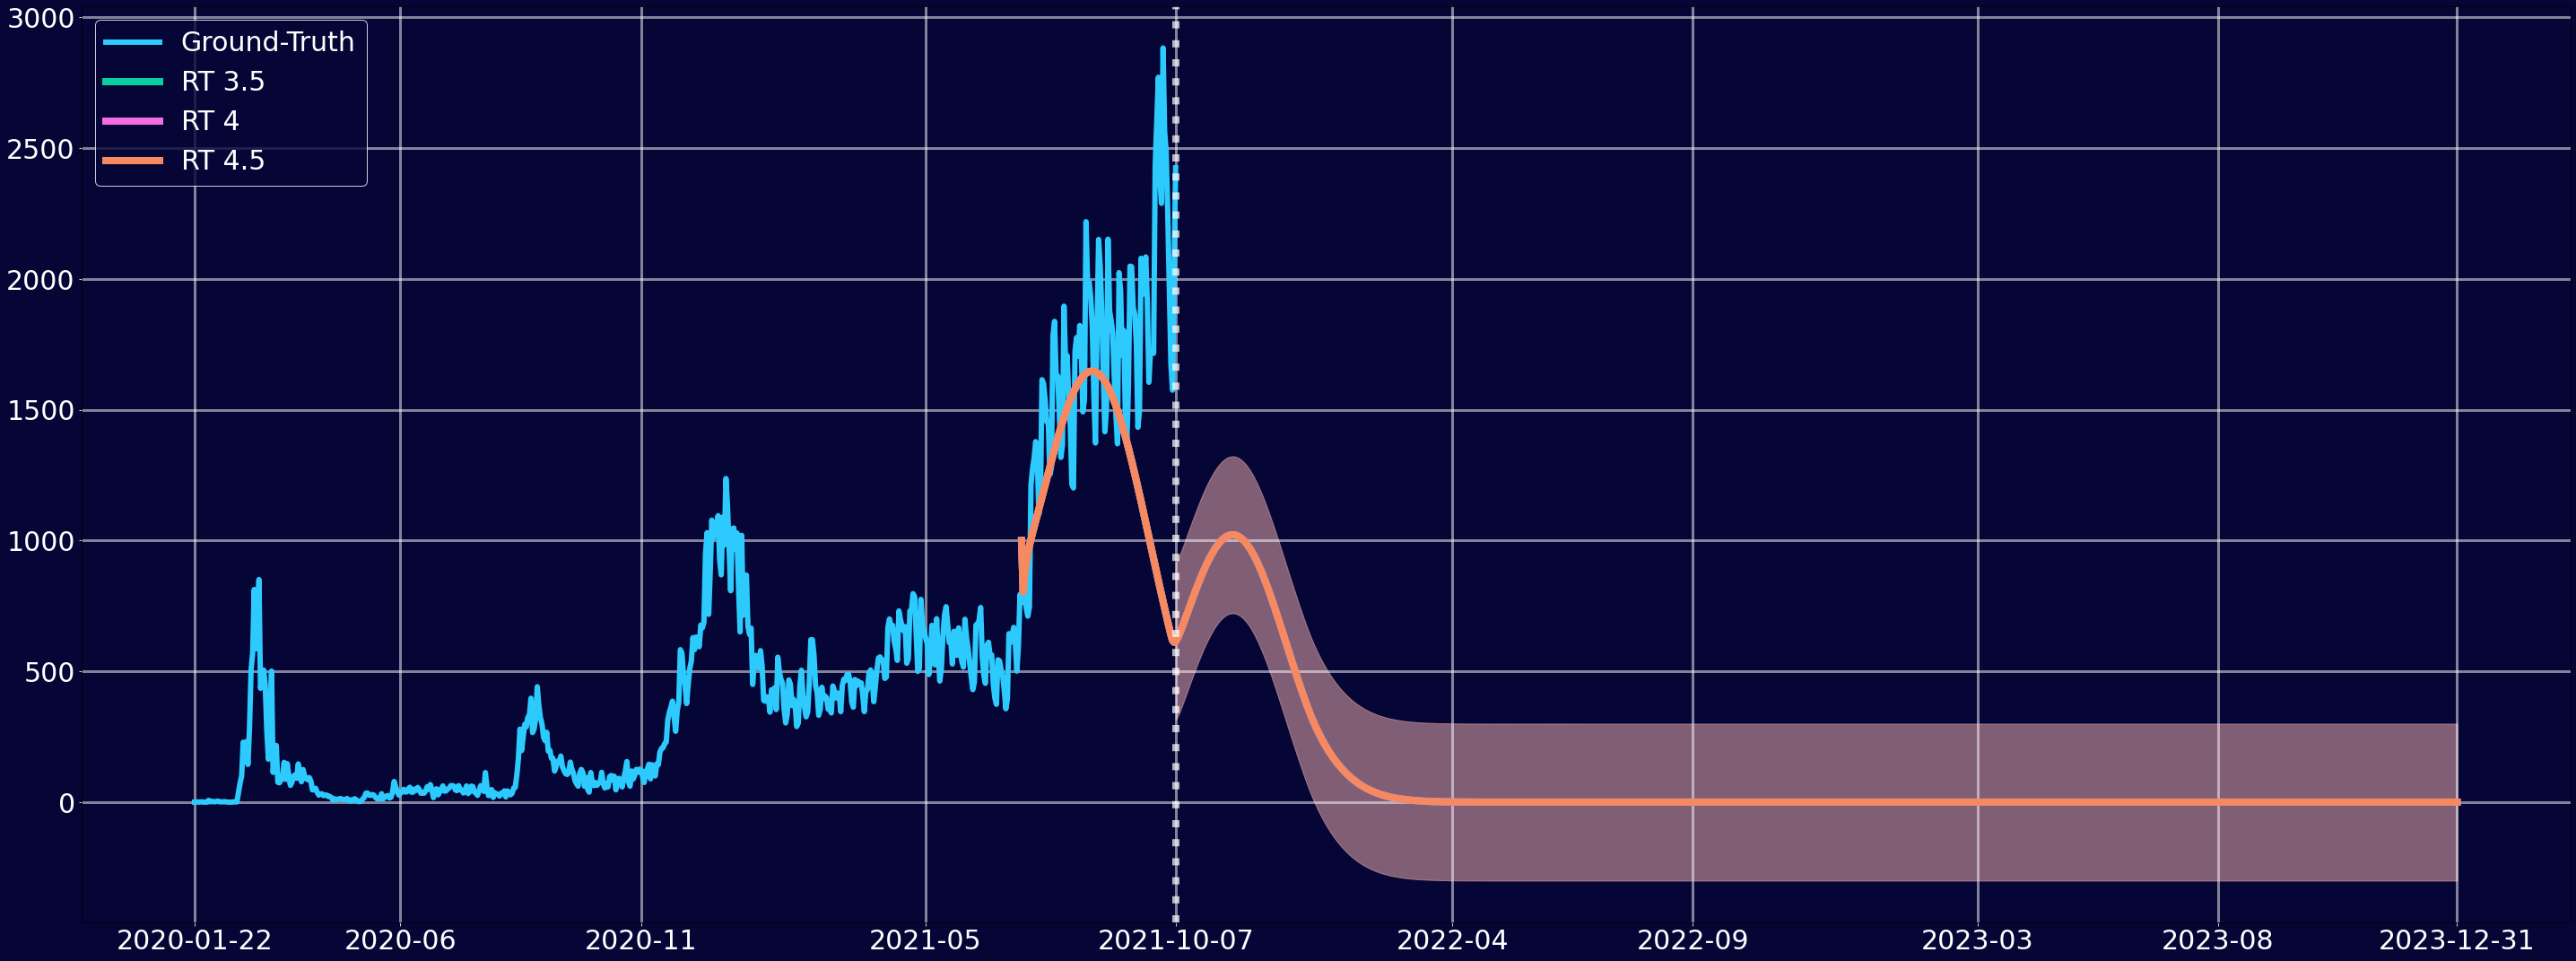

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3069678366.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

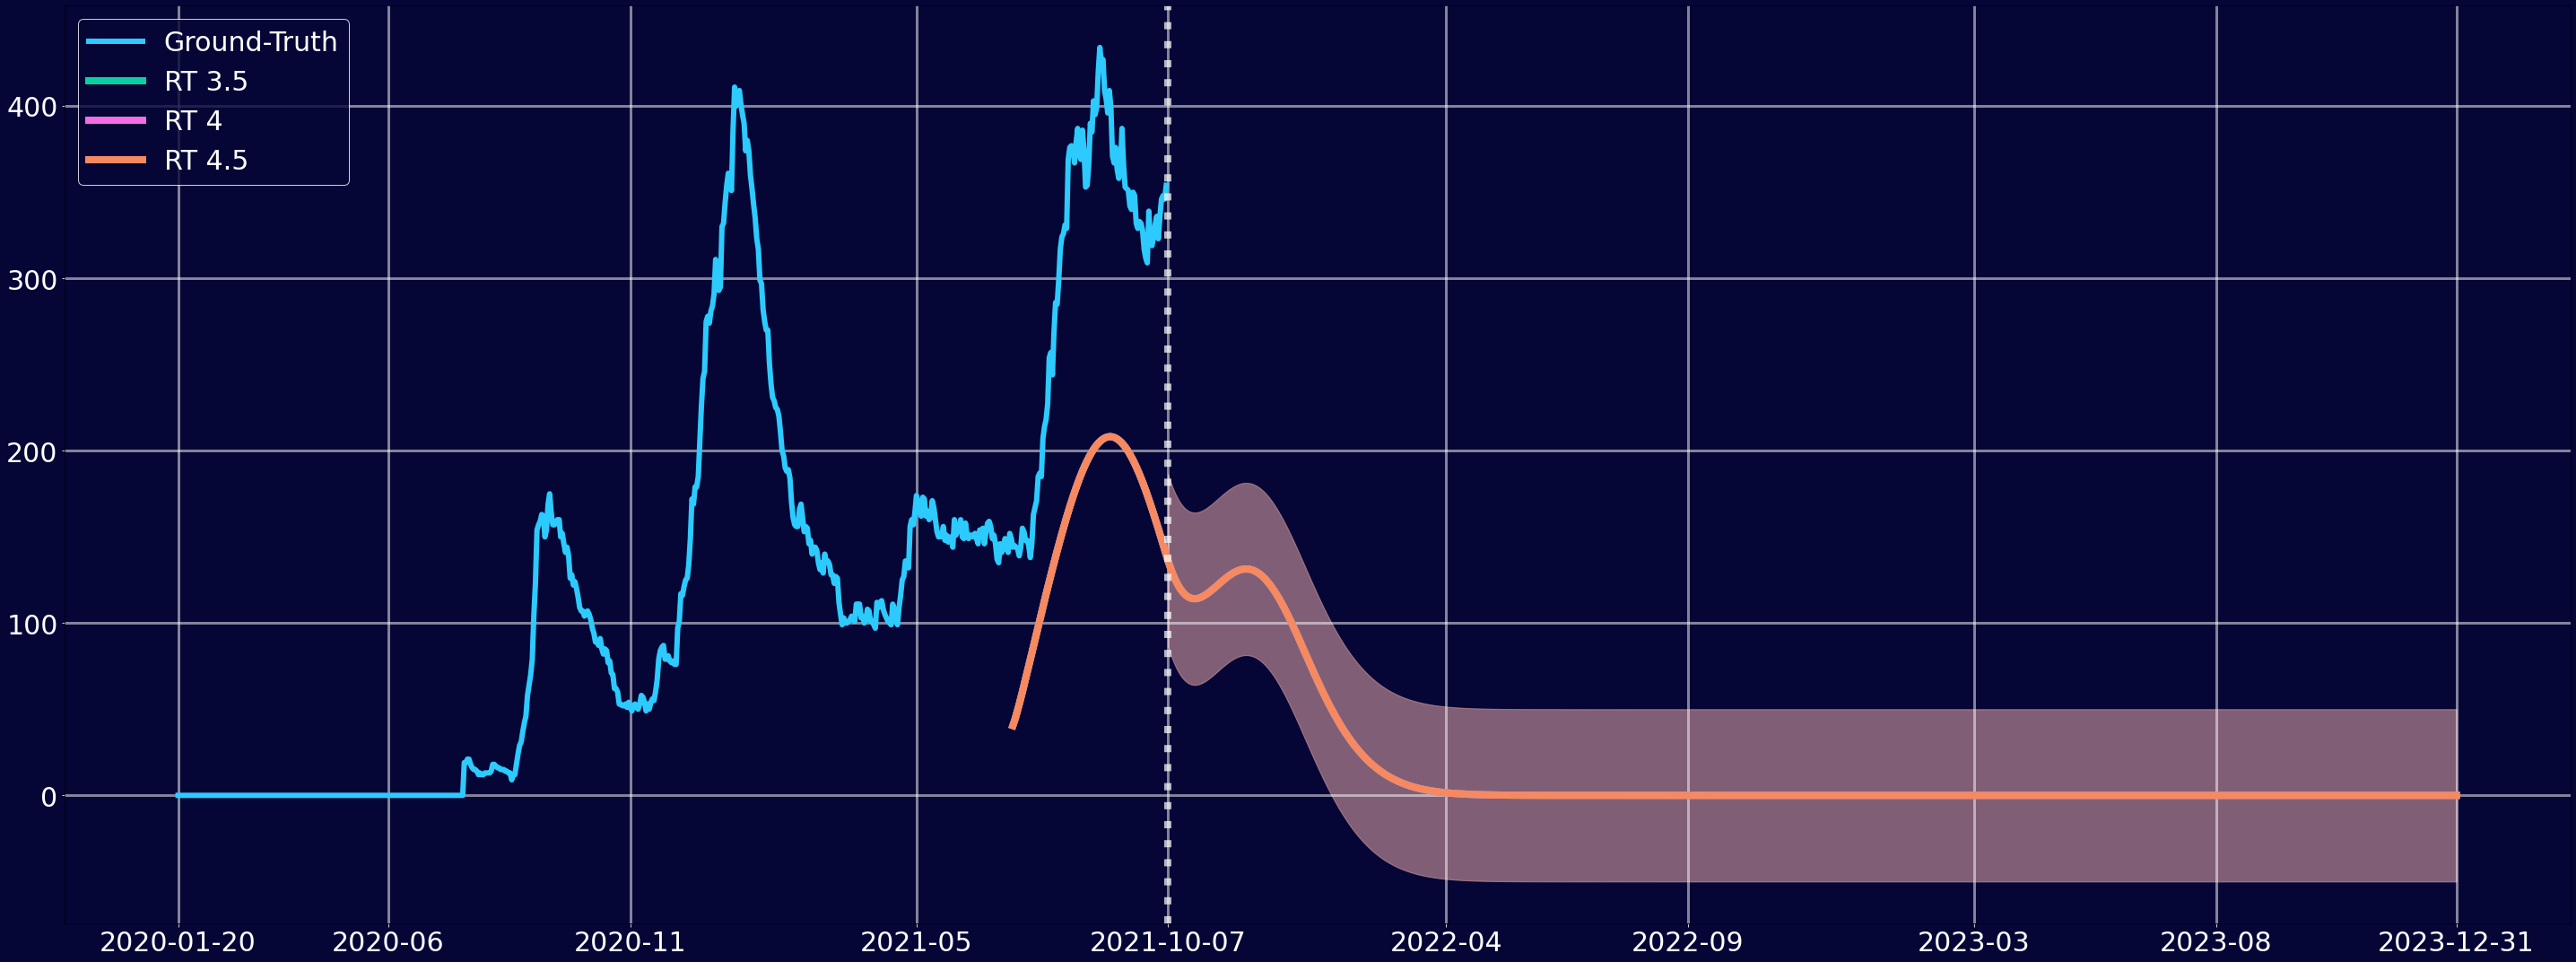

C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_11716/3014896435.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

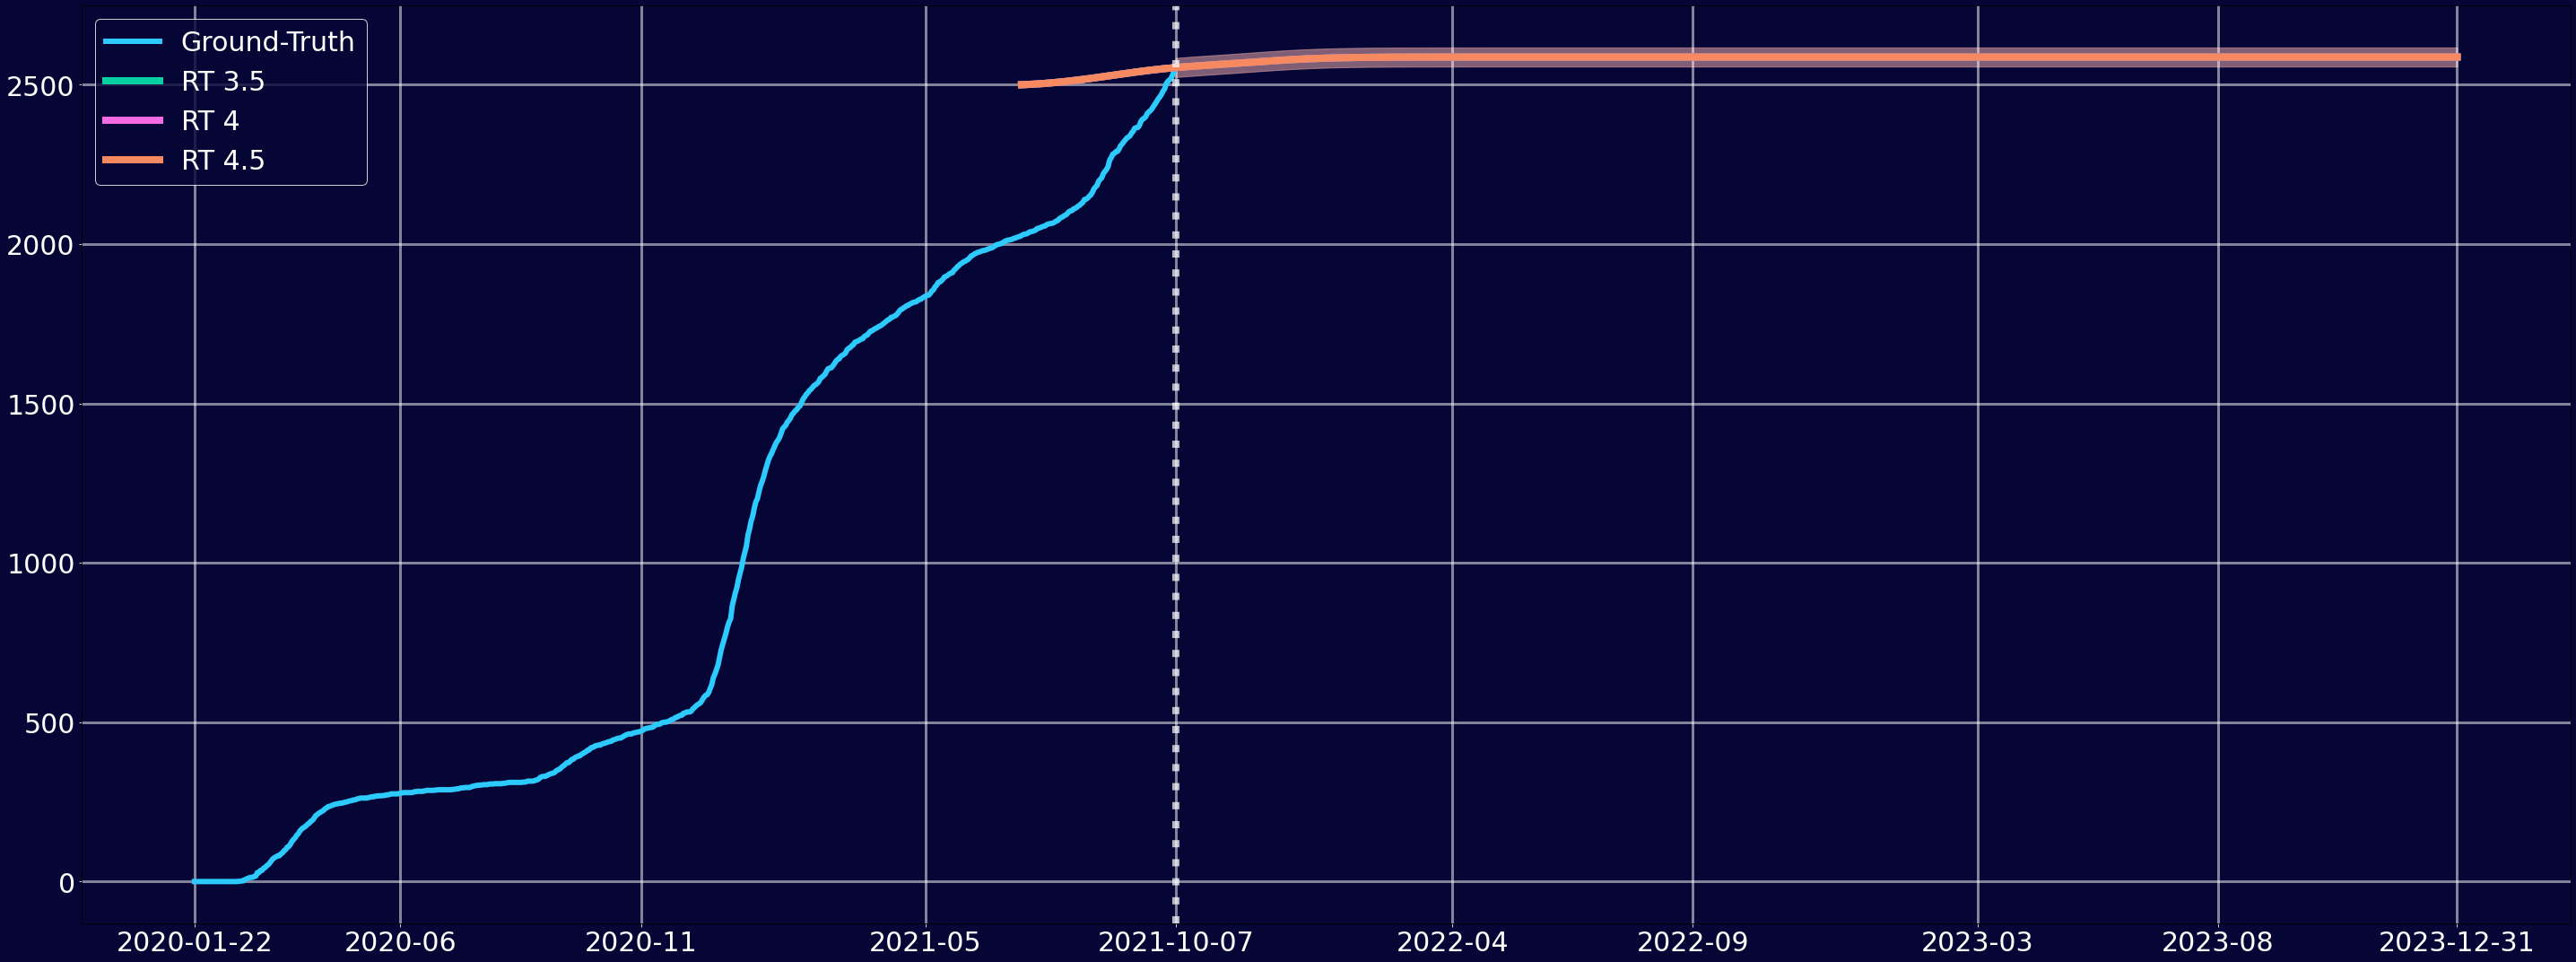

In [168]:
for n in npi:
    if n == npi[0]:      # npi값이 작을수록 값이 높게나옴
        file_name_n1 = 'Base'
    elif n == npi[1]:   # 2 weeks
        file_name_n1 = 'Low'
#     elif n == npi[2]:   # 4 weeks
#         file_name_n1 = 'n_High'
    for v in vac:
        if v == vac[1]:      # base
            file_name_vac = 'Base'
#             y_lim = [-300,13000]
        elif v == vac[0]:   # low
            file_name_vac = 'Low'
#             y_lim = [-300,100000]
        elif v == vac[2]:   # high
            file_name_vac = 'High'
#             y_lim = [-300,4000]
#         for n2 in npi2:
#             if n2 == npi2[1]:      # base
#                 file_name_n2 = 'n2_Base'
#             elif n2 == npi2[0]:   # low
#                 file_name_n2 = 'n2_Low'
# #             elif n2 == npi2[2]:   # high
# #                 file_name_n2 = 'n2_High'
        for t in test:
            if t == test[1]:      # base
                file_name_test = 'Base'
            elif t == test[0]:   # low
                file_name_test = 'Low'
            elif t == test[2]:   # high
                file_name_test = 'High'
            
            file_name = file_name_date+'_'+file_name_vac+"_300_"+file_name_n1
            rt_tp_data = tp_data.loc[(tp_data['NPI']==n)&(tp_data['VACCINE_']==v)&(tp_data['TEST_']==t)]
            rt_s_d_data = s_d_data.loc[(s_d_data['NPI']==n)&(s_d_data['VACCINE_']==v)&(tp_data['TEST_']==t)]
            if t == test[1]:
                TP_Plot(rt_tp_data,'RT',file_name,rt)
                S_Plot(rt_s_d_data,'RT',file_name,rt)
                D_Plot(rt_s_d_data,'RT',file_name,rt)


In [82]:
# for n in npi:
#     if n == npi[1]:      # 0 week
#         file_name_n1 = 'n_Base'
#     elif n == npi[0]:   # 2 weeks
#         file_name_n1 = 'n_Low'
#     elif n == npi[2]:   # 4 weeks
#         file_name_n1 = 'n_High'
#     for v in vac:
#         if v == vac[1]:      # base
#             file_name_vac = 'v_Base'
#         elif v == vac[0]:   # low
#             file_name_vac = 'v_Low'
#         elif v == vac[2]:   # high
#             file_name_vac = 'v_High'
#         for n2 in npi2:
#             if n2 == npi2[1]:      # base
#                 file_name_n2 = 'n2_Base'
#             elif n2 == npi2[0]:   # low
#                 file_name_n2 = 'n2_Low'
# #             elif n2 == npi2[2]:   # high
# #                 file_name_n2 = 'n2_High'
#             for t in test:
#                 if t == test[1]:      # base
#                     file_name_test = 't_Base'
#                 elif t == test[0]:   # low
#                     file_name_test = 't_Low'
#                 elif t == test[2]:   # high
#                     file_name_test = 't_High'

#                 file_name = file_name_date+'_'+file_name_vac+"_"+file_name_n1+"_"+file_name_n2+"_"+file_name_test
#                 rt_tp_data = tp_data.loc[(tp_data['NPI']==n)&(tp_data['VACCINE_']==v)&(tp_data['TEST_']==t)]
#         #         rt_s_d_data = s_d_data.loc[(s_d_data['NPI_']==n)&(s_d_data['VACCINE_']==v)&(tp_data['TEST_']==test[0])]
#                 TP_Plot(rt_tp_data,'RT',file_name,rt)
#         #         S_Plot(rt_s_d_data,'RT',file_name,rt)
#         #         D_Plot(rt_s_d_data,'RT',file_name,rt)